# Modelo(s) en Python para Predecir los Precios de las Viviendas

Nivel: Principiantes

# Etapa 1. Recopilación de datos

## Los datos

El estudio original investiga los problemas metodológicos asociados al uso de datos del mercado de la vivienda para medir la disposición a pagar por un aire limpio.  Utilizando un modelo hedónico de precios de la vivienda y datos del área metropolitana de Boston, se generan estimaciones cuantitativas de la disposición a pagar por mejoras de la calidad del aire (Journal of Environmental Economics and Management, marzo 1978) .

La Teoría de Precios Hedónicos pretende explicar el valor de un bien, entendido como un conjunto de atributos (superficie, aptitud de uso del suelo, calidad de la construcción, diseño interior y exterior, áreas verdes, ubicación características del vecindario, etc.), en función de cada uno de ellos obteniendo sus respectivas valoraciones. El modelo permite identificar la importancia relativa de cada atributo en el valor asignado por el mercado a un bien particular, mediante lo cual es posible determinar cómo cambiará dicho valor al variar la cantidad y calidad en que se encuentra presente cada uno de estos atributos, y consecuentemente, ayudar a explicar y predecir precios.

El Método de Regresiones Hedónicas atribuido a Rosen (1974) y Lancaster (1966) se basa en estimaciones del precio de un producto a partir de un vector de características del mismo, en el que pueden calcularse contribuciones marginales de cada una de esas características sobre la variable dependiente y así estimar los efectos condicionales de determinadas características sobre el precio.

La etiqueta de precios hedónicos, reflejaba el bienestar o disfrute (que es lo que significa originalmente hedónico en griego) que ofrece cada componente.

Fuente: (manfrino, 2021), (Lopez,s.f.) y (Hill, 2011)

## Boston


Boston fue fundada el 7 de septiembre de 1630 por los puritanos, un grupo religioso expulsado de Inglaterra en el siglo XVII.

Esta ubicado en la costa del Atlántico Norte de Estados Unidos de América, **es la capital** y ciudad más poblada del estado de Massachusetts, y una de las ciudades más antiguas de los Estados Unidos. Al tratarse de la ciudad más poblada, es considerada el centro económico y cultural de la región.


**Economía**

Los institutos y universidades de Boston tienen un gran impacto en la economía de la ciudad y de la región. No solo son una de las principales fuentes de empleo, sino que también atraen industrias de alta tecnología a la ciudad y a la región circundante. El área de Boston es la sede de empresas de tecnología como EMC Corporation y Analog Devices, y de empresas de comercio electrónico como Vistaprint y CSN Stores. Boston es también un importante centro de empresas de biotecnología, entre las que se incluyen Millennium Pharmaceuticals, Merck & Co., Millipore, Genzyme y Biogen Idec. Según un informe de 2003 por la Autoridad de Reurbanización de Boston, los estudiantes matriculados en los institutos y universidades de Boston contribuyen con 4.800 millones de dólares anuales a la economía de la ciudad. Boston también recibe la mayor cantidad absoluta de la financiación anual de los Institutos Nacionales de la Salud de todas las ciudades en los Estados Unidos.

El turismo comprende una gran parte de la economía de Boston y uno de los diez destinos turísticos más populares del país (Wikipedia).


Sitios oficiales de la ciudad de Boston y Massachusetts: https://www.boston.gov/ y https://www.usa.gov/es/estados/massachusetts

## Mercado Inmobiliario de Boston

En los barrios céntricos como Cambridge (donde está Harvard), Sommerville, South End y Back Bay y Brookline, entre otros, todos los meses de septiembre da inicio del ciclo lectivo y recibe a 500,000 estudiantes. En términos cuantitativos, a los alumnos hay que sumarles sus familias y los profesores: todos ellos necesitan un lugar donde vivir, están tanto los que quieren comprar una propiedad como los que optan por alquilar.

En Boston en particular y en Estados Unidos en general, conviene remodelar antes que construir, “por un tema de tiempos y permisos municipales, sobre todo en zonas céntricas”. Además, se pide mucho el cuidado de las fachadas. “En este marco, se produce un diálogo entre lo viejo y lo nuevo”, resaltando que es ese diálogo el que dota a la ciudad de una fuerte identidad. Sin embargo, tambien hace que la nueva construcción sea extremadamente difícil y, como resultado, el éxito económico conduce a precios más altos, no a un gran número de nuevas viviendas.

Cuando se produjo la crisis de las hipotecas, en 2008, los valores de las propiedades en Boston fueron de los que menos cayeron frente a los de otras ciudades de EE.UU. Los valores sólo cayeron un 5% frente al 50% en que lo hicieron en el sur del país. Se considera una plaza que se caracteriza por la estabilidad. El negocio ofrece una rentabilidad anual que estiman en el orden del **6 a 7%**, porcentaje que no incluye la revalorización del inmueble. En consecuencia, Boston se enfrenta a unos precios de la vivienda extraordinariamente altos.

La regulación de la nueva construcción es seguramente el área política más importante a la que se enfrenta Boston hoy en día.

Fuente: Exponencial Investments, mayo 2023 y NATIONAL BUREAU OF ECONOMIC RESEARCH, Cambridge, December 2003.

# Etapa 2: EDA

In [1]:
# Libreriras

import pandas as pd               # manipulacion y tratamiento de datos
import numpy as np                # cálculo numérico y el análisis de datos

import seaborn as sns             # graficos
import matplotlib.pyplot as plt   # graficos
%matplotlib inline

from scipy import stats           # matemáticas, ciencias e ingeniería

import warnings
warnings.filterwarnings('ignore') # suprime mensajes repetidos de la misma fuente


In [2]:
# Montar drive
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [3]:
# Importar y asignar data
df = pd.read_csv("/content/gdrive/MyDrive/SeriesTiempo Forcasting/BostonHousing/0.boston_house_prices.csv")


###  1. Explorar la data

In [4]:
# Copia del df para realizar EDA
df_eda = df.copy()


In [5]:
# Informacion general del datset
df_eda.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


La base tiene 14 variables, 506 filas y no tiene nulos.

In [6]:
# Ver primeras filas
df_eda.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Descripcion por variable:

  - CRIM     per capita crime rate by town ( tasa de delincuencia per cápita por ciudad)

  - ZN       proportion of residential land zoned for lots over 25,000 sq.ft (proporción de suelo residencial zonificado para parcelas de más de 25.000 pies cuadrados)

  - INDUS    proportion of non-retail business acres per town (proporción de acres comerciales no minoristas por ciudad)

  - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) (1 si la zona linda con el río; 0 en caso contrario)

  - NOX      nitric oxides concentration (parts per 10 million) (concentración de óxidos nítricos (partes por 10 millones)

  - RM       average number of rooms per dwelling (número medio de habitaciones por vivienda)

  - AGE      proportion of owner-occupied units built prior to 1940 (proporción de unidades ocupadas por sus propietarios construidas antes de 1940)

  - DIS      weighted distances to five Boston employment centres (distancias ponderadas a cinco centros de empleo de Boston)

  - RAD      index of accessibility to radial highways (índice de accesibilidad a autopistas radiales-nacionales o federales)

  - TAX      full-value property-tax rate per $10,000 (impuesto sobre bienes inmuebles por cada 10.000 dólares)

  - PTRATIO  pupil-teacher ratio by town (ratio alumnos-profesor por ciudad)

  - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

  - LSTAT    % lower status of the population (% de estatus inferior-ingresos bajos de la población)

  - MEDV     Median value of owner-occupied homes in $1000's (valor medio de las viviendas ocupadas por sus propietarios en miles de dólares)

In [7]:
# Eliminar columna
df_eda.drop('B', axis=1, inplace=True)

# The Boston housing prices dataset has an ethical problem, https://scikit-learn.org/1.0/modules/generated/sklearn.datasets.load_boston.html


In [8]:
# Ver tipos de datos

# Cantidad datos por tipo
print('"1. Conteo Tipo de Dato"')
tipos_datos = df_eda.dtypes
print(tipos_datos.value_counts())
print('==========================')

## % datos por tipo
print('"2. % por Tipo de Dato"')
tipos_datos = df_eda.dtypes
print(tipos_datos.value_counts(normalize=True))


"1. Conteo Tipo de Dato"
float64    10
int64       3
dtype: int64
"2. % por Tipo de Dato"
float64    0.769231
int64      0.230769
dtype: float64


In [9]:
# Número de elementos únicos en cada columna
df_eda.nunique()

# nunique(): cuenta el número de valores únicos en una serie. Un valor único es aquel que aparece solo una vez en la serie.
# excluye los valores NaN (datos faltantes o no disponibles)


CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
LSTAT      455
MEDV       229
dtype: int64

In [10]:
# Ver datos nulos por columna
df_eda.isnull()

# isnull(): detecta el valor faltante de un objeto


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
# Ver valores nulos por fila
df_eda[df.isnull().any(axis=1)]


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV


In [12]:
# Estadistica descriptiva
descriptiva = round(df_eda.describe(), 2).T.style.background_gradient(cmap= 'YlGn')
descriptiva

# round: redondear los valores en el resultado de df.describe() a 2 decimales
# T.: transpone el resultado y aplica un formato de gradiente de color utilizando el método style.background_gradient con la paleta de colores 'YlGn'
# en este caso no muestra redondeados por problemas con el style.background_gradient


,count,mean,std,min,25%,50%,75%,max
CRIM,506.000000,3.610000,8.600000,0.010000,0.080000,0.260000,3.680000,88.980000
ZN,506.000000,11.360000,23.320000,0.000000,0.000000,0.000000,12.500000,100.000000
INDUS,506.000000,11.140000,6.860000,0.460000,5.190000,9.690000,18.100000,27.740000
CHAS,506.000000,0.070000,0.250000,0.000000,0.000000,0.000000,0.000000,1.000000
NOX,506.000000,0.550000,0.120000,0.380000,0.450000,0.540000,0.620000,0.870000
RM,506.000000,6.280000,0.700000,3.560000,5.890000,6.210000,6.620000,8.780000
AGE,506.000000,68.570000,28.150000,2.900000,45.020000,77.500000,94.070000,100.000000
DIS,506.000000,3.800000,2.110000,1.130000,2.100000,3.210000,5.190000,12.130000
RAD,506.000000,9.550000,8.710000,1.000000,4.000000,5.000000,24.000000,24.000000
TAX,506.000000,408.240000,168.540000,187.000000,279.000000,330.000000,666.000000,711.000000


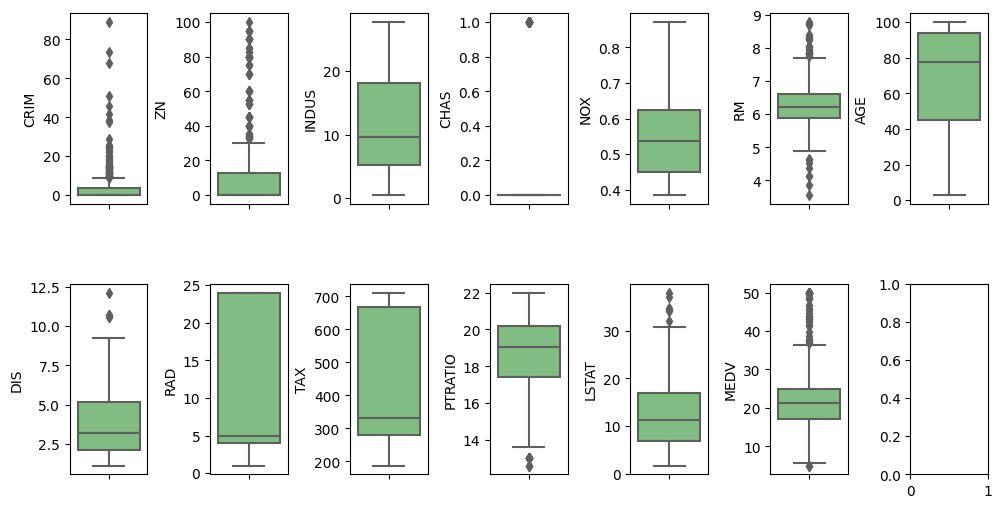

In [13]:
# Ver distribucion por variable

# Cuadro general
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(10, 5)) #ancho x alto
index = 0
axs = axs.flatten()

# Funcion
for k,v in df_eda.items():
    sns.boxplot(y=k, data=df_eda, ax=axs[index], palette='YlGn')
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)


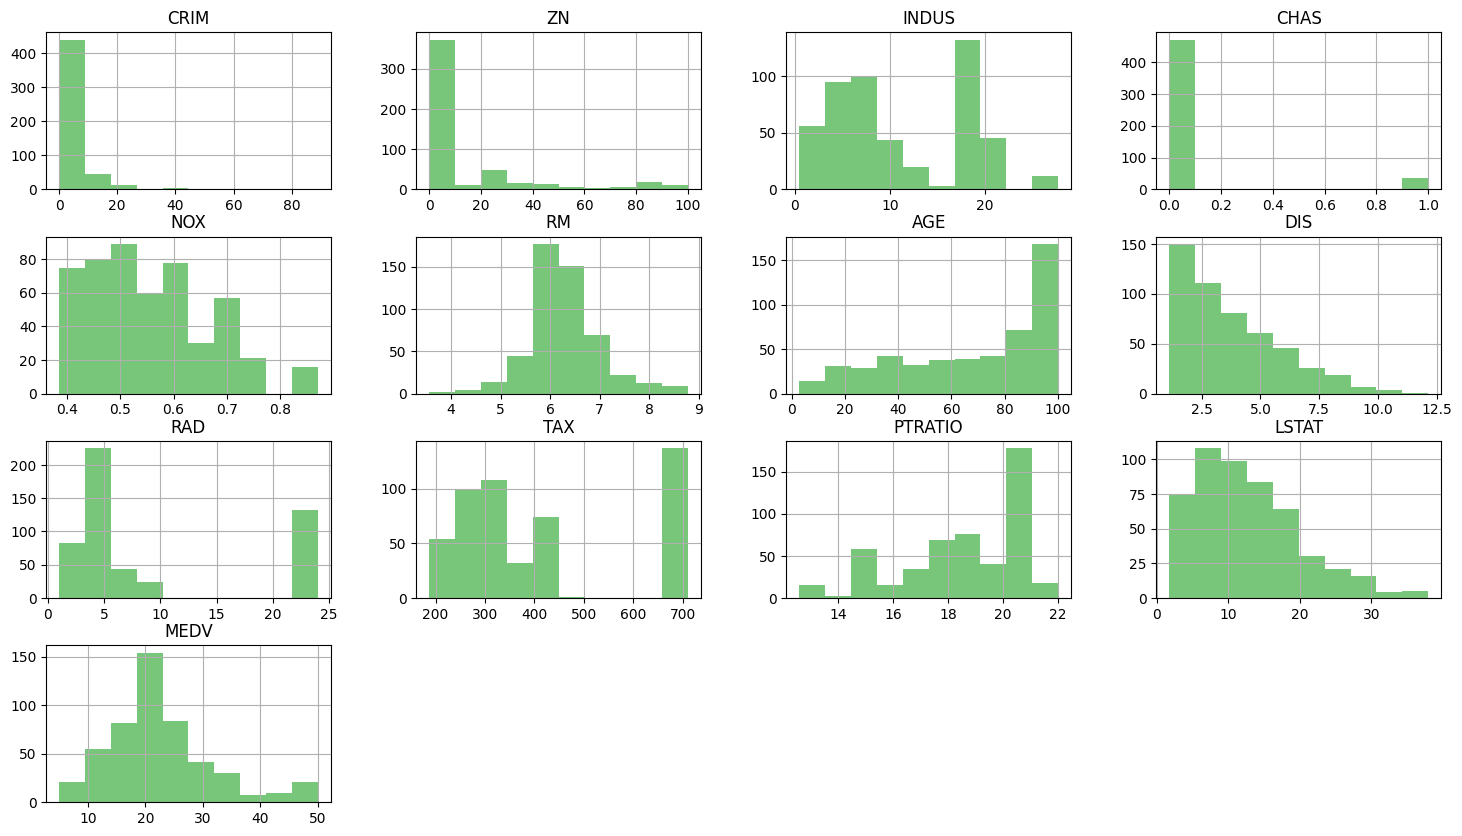

In [14]:
# Distribucion de frecuencias por variable
df_eda.hist(figsize=(18,10), color='#78C679')  #ancho x alto
plt.show()


In [15]:
# Matriz de correlacion
matriz_correlation = df_eda.corr().style.background_gradient(cmap='YlGn')
matriz_correlation


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993,-0.468536


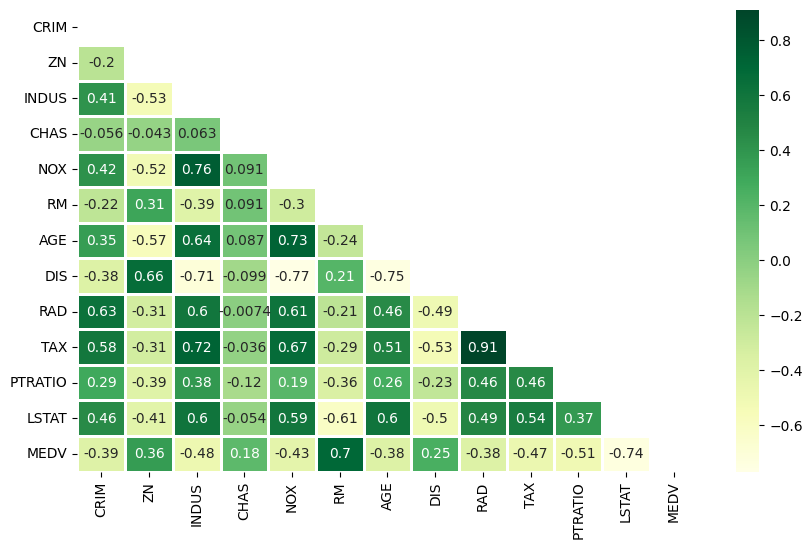

In [16]:
# Grafico de correlacion con heatmap
plt.figure(figsize=(10, 6))  # ancho de 12 pulgadas y altura de 8 pulgadas
matrix = np.triu(df_eda.corr())
sns.heatmap(df_eda.corr(), annot=True,
            linewidth=.8, mask=matrix, cmap='YlGn');


Las variabbles que tienen correlacion con el precio (MEDV), son:

LSTAT -0.74 % más bajo de la población, negativa

RM 0.7 número medio de habitaciones por vivienda, positiva

PTRATIO -0.51 ratio alumno-profesor por ciudad

TAX -0.47  tipo del impuesto sobre bienes inmuebles de valor íntegro por 10.000 dólares

INDUS -0.48 proporción de acres comerciales no minoristas por ciudad

NOX  -0.43 concentración de óxidos nítricos

RAD -0.38 índice de accesibilidad a autopistas radiales

### 2. Outliers

In [17]:
# Crear copia de df_eda
df_outliers = df_eda.copy()


In [18]:
# Funcion detectar-contar outilers por columna

def detectar_outliers(df_outliers):

    # Crear una lista vacía para almacenar información sobre valores atípicos
    outliers_list = []

    # Recorrer todas las columnas del DataFrame
    for column in df_outliers.columns:
        # Verificar si la columna es de tipo numérico
        if df_outliers[column].dtype in ['int64', 'float64']:
            # Calcular el rango intercuartílico (IQR)
            Q1 = df_outliers[column].quantile(0.25)
            Q3 = df_outliers[column].quantile(0.75)
            IQR = Q3 - Q1

        # Calcular los límites inferior y superior para detectar valores atípicos
            minimo = Q1 - (1.5*IQR)
            maximo = Q3 + (1.5*IQR)

        # Contar el número de valores atípicos en la columna
            num_outliers = ((df_outliers[column] < minimo) | (df_outliers[column] > maximo)).sum()

        # Agregar información sobre valores atípicos a la lista
            outliers_list.append({'Columna': column, 'Numero de Outliers': num_outliers})

        # Convertir la lista en un DataFrame y devolverlo
            outliers_df = pd.DataFrame(outliers_list)
    return outliers_df

outliers_count = detectar_outliers(df_outliers)

print(outliers_count)


    Columna  Numero de Outliers
0      CRIM                  66
1        ZN                  68
2     INDUS                   0
3      CHAS                  35
4       NOX                   0
5        RM                  30
6       AGE                   0
7       DIS                   5
8       RAD                   0
9       TAX                   0
10  PTRATIO                  15
11    LSTAT                   7
12     MEDV                  40


In [19]:
# Funcion para tratar valores atipico con 'winsorize'
from scipy.stats.mstats import winsorize

def valores_atipicos (df_outliers):
    cols = list(df_outliers)
    for col in cols:
        if col in df_outliers.select_dtypes(include=np.number).columns:
            df_outliers[col] = winsorize(df_outliers [col], limits=[0.05, 0.05],inclusive=(True, True))

    return df_outliers

df_wins = valores_atipicos(df_outliers)


Winsorize: ajusta valores atípicos a un percentil específico de los datos https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mstats.winsorize.html

Este método es útil cuando hay valores negativos en los datos y ceros en las características que no se pueden tratar con transformadas logarítmicas o raíces cuadradas.

Al aplicar la función (con una winsorización del 90%) a una columna con límites de 0.05 en ambos extremos, lo que significa es que el 5% de los valores más bajos y el 5% de los valores más altos serán reemplazados por el percentil 5 y el percentil 95, respectivamente.

In [20]:
# Verificar cambios de Winsorize

# Antes de aplicar la función Winsorize
print("Antes de aplicar la función Winsorize:")
print(df_eda.describe())

# Después de aplicar la función Winsorize
print("Después de aplicar la función Winsorize:")
print(df_outliers.describe())


Antes de aplicar la función Winsorize:
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO       LSTAT  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534   1

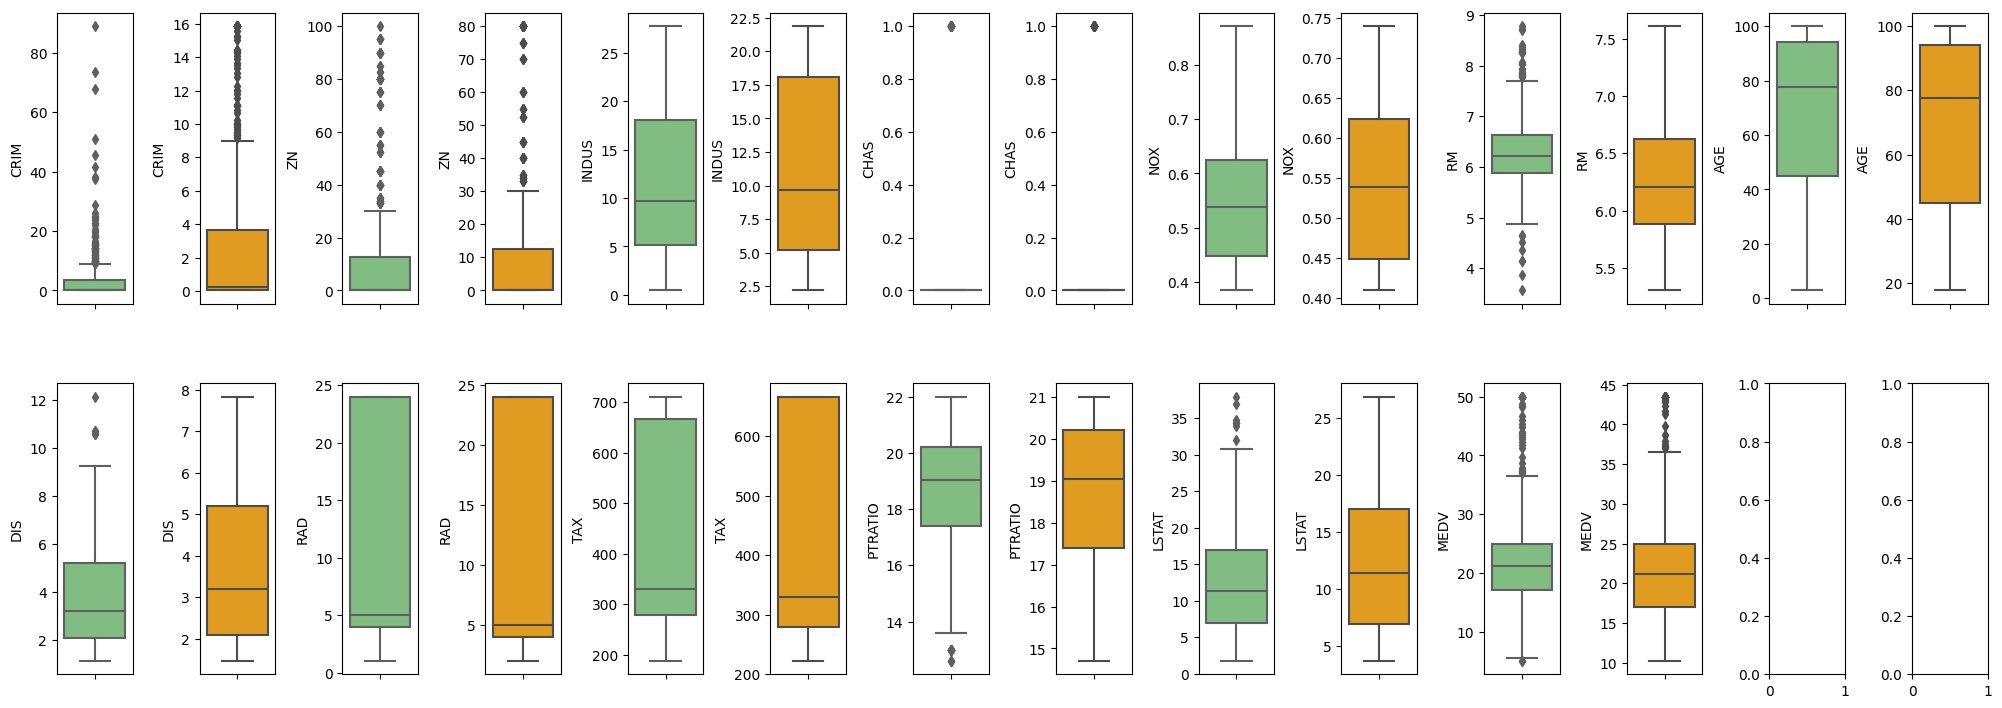

In [21]:
# Comparar cambios con bloxplot

# Cuadro general
fig, axs = plt.subplots(ncols=14, nrows=2, figsize=(20, 7)) #ancho x alto
index = 0
axs = axs.flatten()

# Boxplots df original - verde
for k,v in df_eda.items():
    sns.boxplot(y=k, data=df_eda, ax=axs[index], palette="YlGn")
    index += 2

index = 1
# Boxplots df con Winsorize - amarillo
for k,v in df_wins.items():
    sns.boxplot(y=k, data=df_wins, ax=axs[index], color="#FFA500")
    index += 2

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)


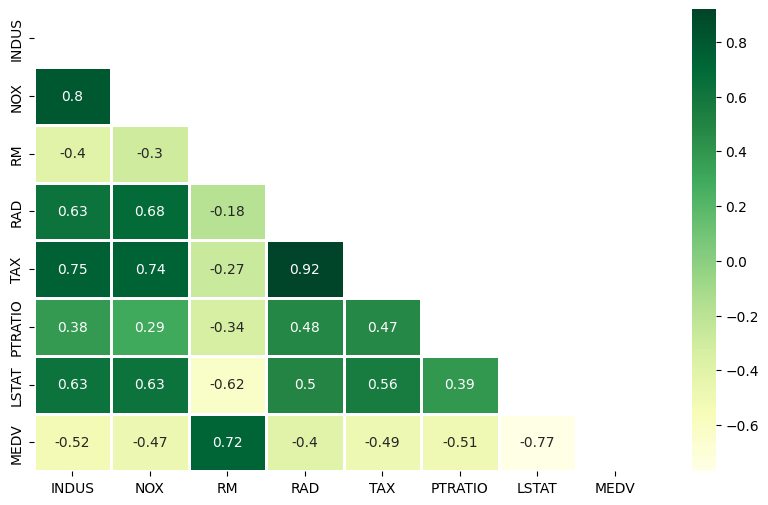

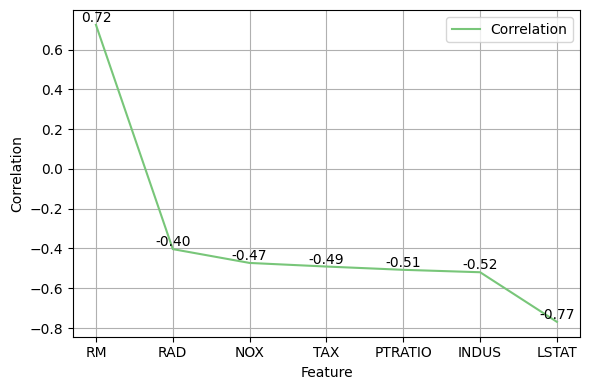

In [22]:
# Graficos de correlacion con heatmap y grafica lineal con data ajustada
from matplotlib.colors import LinearSegmentedColormap

# Crear  paleta de colores personalizada
cmap = LinearSegmentedColormap.from_list('mycmap', ['mediumseagreen', 'orange'])

# Grafico de correlacion con heatmap
plt.figure(figsize=(10, 6))
matrix = np.triu(df_wins[[ 'INDUS', 'NOX', 'RM', 'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV']].corr())
sns.heatmap(df_wins[[ 'INDUS', 'NOX', 'RM', 'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV']].corr(), annot=True, linewidth=.8, mask=matrix, cmap="YlGn")

# Grafica lineal de correlacion
# Galcular la correlación entre las variables seleccionadas y MEDV
variables = ['INDUS', 'NOX', 'RM', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']
corr = df_wins[variables + ['MEDV']].corr()['MEDV'].sort_values(ascending=False)

# Graficar la correlación
plt.figure(figsize=(6,4))
plt.plot(corr[1:], label="Correlation", color="#78C679")
plt.ylabel("Correlation")
plt.xlabel("Feature")
plt.legend()
plt.tight_layout()
plt.grid(True)
# Agregar valores de correlación a la gráfica
for i, value in enumerate(corr[1:]):
    plt.text(i, value, f"{value:.2f}", ha="center", va="bottom")
# Mostrar grafica
plt.show()

# Para cambiar la paleta de colores de un gráfico de calor (heatmap) generado con Seaborn, puede utilizar el parámetro 'cmap' y especificar el nombre de una paleta de colores predefinida o crear una paleta de colores personalizada.
# Crear una paleta de colores personalizada utilizando la función LinearSegmentedColormap.from_list de Matplotlib.
# En este ejemplo, se creó una paleta de colores personalizada utilizando la función LinearSegmentedColormap.from_list y especificando los colores 'mediumseagreen' y 'orange'.
# Luego, se utilizó esta paleta de colores en el gráfico de calor especificando el parámetro cmap=cmap en la función sns.heatmap.


Las variables que tienen **correlacion con el precio (MEDV)** que cambiaron y NO cambiaron el indicador:

LSTAT de -0.74 a -0.77 (% más bajo de la población), negativa

RM de 0.7 a 0.72 (número medio de habitaciones), positiva

INDUS de -0.48 a -0.52 (proporción de acres comerciales no minoristas por ciudad), negativa

PTRATIO -0.51 a NO cambio (ratio alumno-profesor por ciudad), negativa

TAX -0.47 a -0.49  (tipo del impuesto sobre bienes inmuebles de valor íntegro por 10.000 dólares), negativa

NOX de -0.43 a -0.47 (concentración de óxidos nítricos), negativa

RAD de -0.38 a -0.4 (índice de accesibilidad a autopistas radiales), negativa

### 3. Explorar cada una de las variables relacionadas con el precio (MEDV)

In [23]:
# Librerias
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt
import seaborn as sns


#### 3.1 LSTAT % lower status of the population (porcentaje de la población de clase baja-bajos ingresos)

El valor de "LSTAT" para un vecindario dado indica el porcentaje de personas con un estatus socioeconómico bajo en esa área, y puede ser una variable para predecir los precios de las casas en ese vecindario.


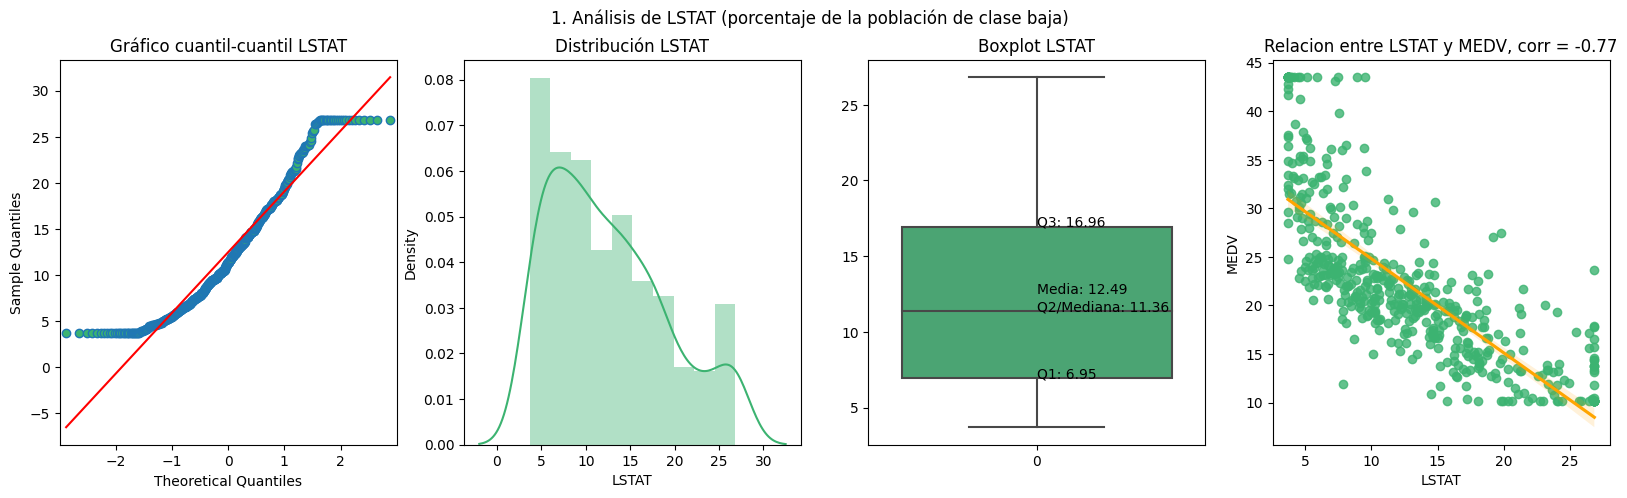

In [24]:
# Cuadro general
# Crea una figura con una fila cuatro columnas, figura a 10x5 pulgadas
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
fig.savefig('mi_figura.png', dpi=300)
fig.suptitle("1. Análisis de LSTAT (porcentaje de la población de clase baja)")

# Grafico Q-Q [1]
qqplot(df_wins['LSTAT'], line = 's', ax=axs[0], markerfacecolor='mediumseagreen')
axs[0].set_title("Gráfico cuantil-cuantil LSTAT")

# Chequear la normalidad de las variables seleccionadas [2]
sns.distplot(df_wins['LSTAT'], ax=axs[1], color='mediumseagreen')
axs[1].set_title("Distribución LSTAT")

# Boxplot
sns.boxplot(df_wins['LSTAT'], ax=axs[2], color='mediumseagreen')
axs[2].set_title("Boxplot LSTAT")
# Calcular los valores de los cuartiles y la media
q1 = df_wins['LSTAT'].quantile(0.25)
q2 = df_wins['LSTAT'].quantile(0.5)
q3 = df_wins['LSTAT'].quantile(0.75)
mean = df_wins['LSTAT'].mean()
# Agregar los valores de los cuartiles y la media a la gráfica
axs[2].text(0, q1, f'Q1: {q1:.2f}')
axs[2].text(0, q2, f'Q2/Mediana: {q2:.2f}')
axs[2].text(0, q3, f'Q3: {q3:.2f}')
axs[2].text(0, mean, f'Media: {mean:.2f}')

# Correlacion entre LSTAT y MEDV
sns.regplot(x="LSTAT", y="MEDV", data=df_wins, fit_reg=True, ax=axs[3], scatter_kws={'color': 'mediumseagreen'}, line_kws={'color': 'orange'})
axs[3].set_title("Relacion entre LSTAT y MEDV, corr = -0.77")

# Mostrar grafica
plt.show()


Esta característica puede tener un impacto significativo en el precio de las viviendas, ya que los vecindarios con un mayor porcentaje de población de clase baja pueden tener, en promedio, precios de viviendas más bajos en comparación con aquellos con un porcentaje más bajo de población de clase baja.

Se reporta un minimo de 1.73 y un maximo de 37.97.


#### 3.2 RM average number of rooms per dwelling (numero promedio de habitaciones por vivienda)

RM en el conjunto de datos proporciona información sobre el tamaño promedio de las viviendas en el vecindario, lo que puede ser un factor importante para predecir los precios de las casas en esa área.

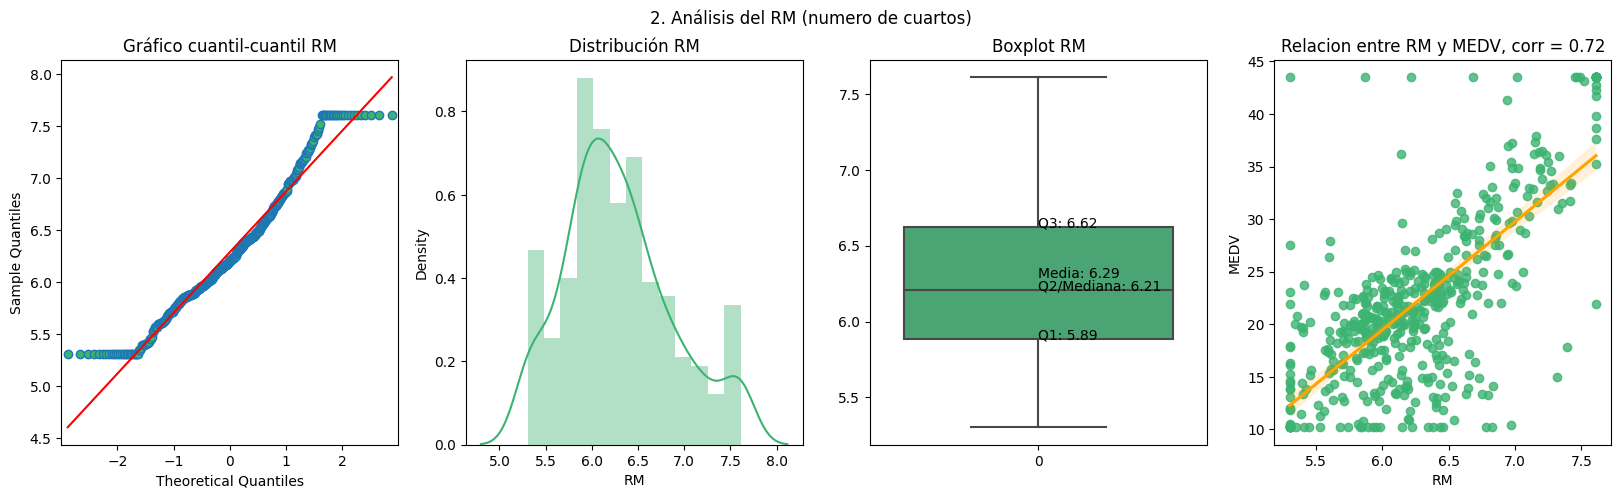

In [25]:
# Cuadro general
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
fig.savefig('mi_figura.png', dpi=300)
fig.suptitle("2. Análisis del RM (numero de cuartos)")

# Grafico Q-Q
qqplot(df_wins['RM'], line = 's', ax=axs[0], markerfacecolor='mediumseagreen')
axs[0].set_title("Gráfico cuantil-cuantil RM")

# Chequear la normalidad de las variables seleccionadas
sns.distplot(df_wins['RM'], ax=axs[1], color='mediumseagreen')
axs[1].set_title("Distribución RM")

# Boxplot
sns.boxplot(df_wins['RM'], ax=axs[2], color='mediumseagreen')
axs[2].set_title("Boxplot RM")
# Calcular los valores de los cuartiles y la media
q1 = df_wins['RM'].quantile(0.25)
q2 = df_wins['RM'].quantile(0.5)
q3 = df_wins['RM'].quantile(0.75)
mean = df_wins['RM'].mean()
# Agregar los valores de los cuartiles y la media a la gráfica
axs[2].text(0, q1, f'Q1: {q1:.2f}')
axs[2].text(0, q2, f'Q2/Mediana: {q2:.2f}')
axs[2].text(0, q3, f'Q3: {q3:.2f}')
axs[2].text(0, mean, f'Media: {mean:.2f}')

# Correlacion entre RM y MEDV
sns.regplot(x="RM", y="MEDV", data=df_wins, fit_reg=True, ax=axs[3], scatter_kws={'color': 'mediumseagreen'}, line_kws={'color': 'orange'})
axs[3].set_title("Relacion entre RM y MEDV, corr = 0.72")

# Mostrar grafica
plt.show()


En general, los vecindarios con un mayor número promedio de habitaciones por vivienda tienden a tener precios de viviendas más altos en comparación con aquellos con un número menor de habitaciones.

Un **alto** valor de RM implica que las casas en ese vecindario tienden a ser más grandes, lo que puede hacer que el precio de las viviendas sea más alto debido al mayor espacio habitable. Por otro lado, un **bajo** valor de RM indica que las casas son más pequeñas y pueden tener precios más bajos.

Se reporta un minimo de 3.56 y un maximo de 8.78.

### 3.3 INDUS proportion of non-retail business acres per town (proporción de acres no residenciales por ciudad)

Esta característica puede ser un indicador del desarrollo industrial o comercial en el área geográfica específica.

La característica INDUS puede ser relevante para predecir los precios de las viviendas, ya que el tipo de desarrollo comercial o industrial en un área puede influir en la demanda de viviendas y, por lo tanto, en sus precios.

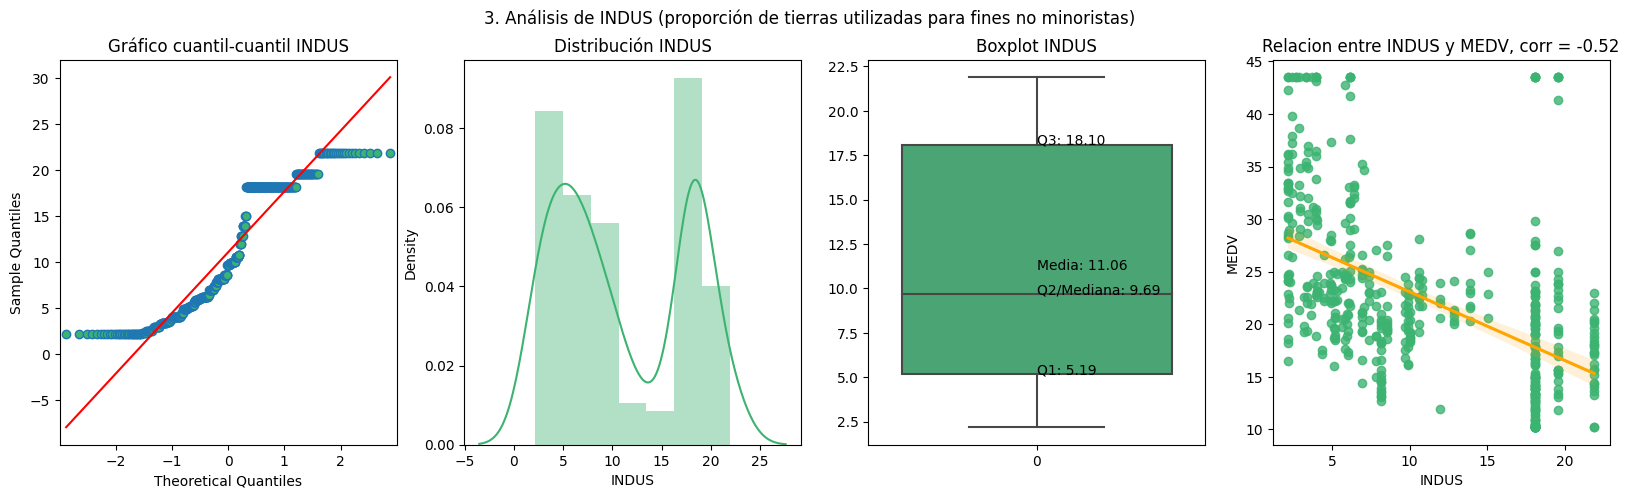

In [26]:
# Cuadro general
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
fig.savefig('mi_figura.png', dpi=300)
fig.suptitle("3. Análisis de INDUS (proporción de tierras utilizadas para fines no minoristas)")

# Grafico Q-Q
qqplot(df_wins['INDUS'], line = 's', ax=axs[0], markerfacecolor='mediumseagreen')
axs[0].set_title("Gráfico cuantil-cuantil INDUS")

# Chequear la normalidad de las variables seleccionadas
sns.distplot(df_wins['INDUS'], ax=axs[1], color='mediumseagreen')
axs[1].set_title("Distribución INDUS")

# Boxplot
sns.boxplot(df_wins['INDUS'], ax=axs[2], color='mediumseagreen')
axs[2].set_title("Boxplot INDUS")
# calcular los valores de los cuartiles y la media
q1 = df_wins['INDUS'].quantile(0.25)
q2 = df_wins['INDUS'].quantile(0.5)
q3 = df_wins['INDUS'].quantile(0.75)
mean = df_wins['INDUS'].mean()
# Agregar los valores de los cuartiles y la media a la gráfica
axs[2].text(0, q1, f'Q1: {q1:.2f}')
axs[2].text(0, q2, f'Q2/Mediana: {q2:.2f}')
axs[2].text(0, q3, f'Q3: {q3:.2f}')
axs[2].text(0, mean, f'Media: {mean:.2f}')

# Correlacion entre INDUS y MEDV
sns.regplot(x="INDUS", y="MEDV", data=df_wins, fit_reg=True, ax=axs[3], scatter_kws={'color': 'mediumseagreen'}, line_kws={'color': 'orange'})
axs[3].set_title("Relacion entre INDUS y MEDV, corr = -0.52")

# Mostrar grafica
plt.show()


Un **alto** valor de INDUS implica que una mayor proporción de tierras en esa ciudad se destina a negocios no minoristas, como industrias o empresas comerciales (no residenciales).

Un **bajo** valor de INDUS indica que la mayoría de las tierras en esa ciudad se utilizan para fines residenciales o minoristas, como áreas residenciales o centros comerciales.

Se reporta un minimo de 0.46 y un maximo de 27.74.

### 3.4 PTRATIO pupil-teacher ratio by town

 Indica la relación entre el número de estudiantes y el número de profesores por distrito escolar.

 Esta proporción es un indicador de la cantidad de atención individual que cada estudiante recibe en el entorno educativo.

 La característica PTRATIO puede ser relevante para predecir los precios de las viviendas, ya que las familias a menudo consideran la calidad de las escuelas y la proporción alumno-maestro como factores importantes al decidir dónde vivir.


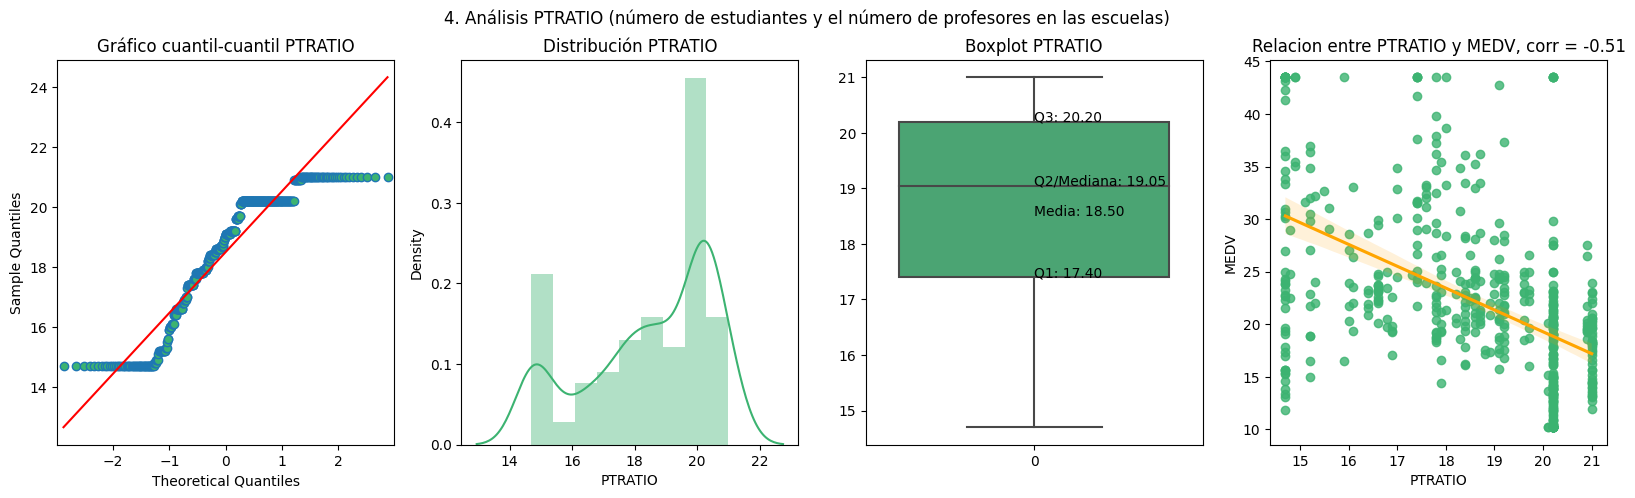

In [27]:
# Cuadro general
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
fig.savefig('mi_figura.png', dpi=300)
fig.suptitle("4. Análisis PTRATIO (número de estudiantes y el número de profesores en las escuelas)")

# Grafico Q-Q
qqplot(df_wins['PTRATIO'], line = 's', ax=axs[0], markerfacecolor='mediumseagreen')
axs[0].set_title("Gráfico cuantil-cuantil PTRATIO")

# Chequear la normalidad de las variables seleccionadas
sns.distplot(df_wins['PTRATIO'], ax=axs[1], color='mediumseagreen')
axs[1].set_title("Distribución PTRATIO")

# Boxplot
sns.boxplot(df_wins['PTRATIO'], ax=axs[2], color='mediumseagreen')
axs[2].set_title("Boxplot PTRATIO")
# Calcular los valores de los cuartiles y la media
q1 = df_wins['PTRATIO'].quantile(0.25)
q2 = df_wins['PTRATIO'].quantile(0.5)
q3 = df_wins['PTRATIO'].quantile(0.75)
mean = df_wins['PTRATIO'].mean()
# Agregar los valores de los cuartiles y la media a la gráfica
axs[2].text(0, q1, f'Q1: {q1:.2f}')
axs[2].text(0, q2, f'Q2/Mediana: {q2:.2f}')
axs[2].text(0, q3, f'Q3: {q3:.2f}')
axs[2].text(0, mean, f'Media: {mean:.2f}')

# Correlacion entre INDUS y MEDV
sns.regplot(x="PTRATIO", y="MEDV", data=df_wins, fit_reg=True, ax=axs[3], scatter_kws={'color': 'mediumseagreen'}, line_kws={'color': 'orange'})
axs[3].set_title("Relacion entre PTRATIO y MEDV, corr = -0.51")

# Mostrar grafica
plt.show()


Un valor **bajo** de PTRATIO indica que hay menos estudiantes por maestro en las escuelas, lo que implica que cada maestro tiene menos estudiantes para atender y, potencialmente, más tiempo para dedicar a cada estudiante individualmente.

Un valor **alto** de PTRATIO indica que hay más estudiantes por maestro, lo que puede implicar que cada maestro tiene una carga de trabajo más grande y menos tiempo para atender a cada estudiante de manera individual.

Vecindarios con una menor proporción alumno-maestro en las escuelas pueden ser percibidos como más deseables y, por lo tanto, pueden tener precios de viviendas más altos.

Se reporta un minimo de 12.6 y un maximo de 22.0.

### 3.5 TAX full-value property-tax rate per $10,000

Indica la tasa impositiva sobre el valor completo de la propiedad en el área geográfica. Esta tasa de impuesto se expresa como una cantidad por cada 10,000 dólares de valor de la propiedad.

La característica TAX puede ser relevante para predecir los precios de las viviendas, ya que la carga de impuestos sobre la propiedad puede afectar el costo total de poseer una vivienda en un área determinada.


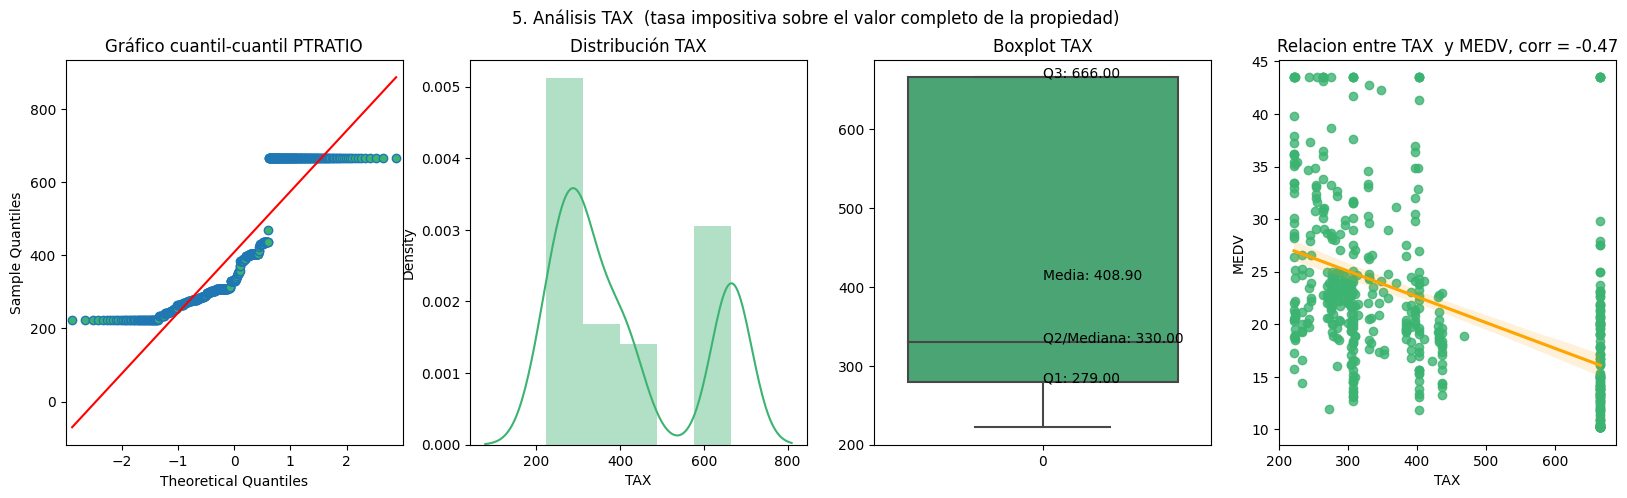

In [28]:
# Cuadro general
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
fig.savefig('mi_figura.png', dpi=300)
fig.suptitle("5. Análisis TAX  (tasa impositiva sobre el valor completo de la propiedad)")

# Grafico Q-Q
qqplot(df_wins['TAX'], line = 's', ax=axs[0], markerfacecolor='mediumseagreen')
axs[0].set_title("Gráfico cuantil-cuantil PTRATIO")

# Chequear la normalidad de las variables seleccionadas
sns.distplot(df_wins['TAX'], ax=axs[1], color='mediumseagreen')
axs[1].set_title("Distribución TAX")

# Boxplot
sns.boxplot(df_wins['TAX'], ax=axs[2], color='mediumseagreen')
axs[2].set_title("Boxplot TAX")
# Calcular los valores de los cuartiles y la media
q1 = df_wins['TAX'].quantile(0.25)
q2 = df_wins['TAX'].quantile(0.5)
q3 = df_wins['TAX'].quantile(0.75)
mean = df_wins['TAX'].mean()
# Agregar los valores de los cuartiles y la media a la gráfica
axs[2].text(0, q1, f'Q1: {q1:.2f}')
axs[2].text(0, q2, f'Q2/Mediana: {q2:.2f}')
axs[2].text(0, q3, f'Q3: {q3:.2f}')
axs[2].text(0, mean, f'Media: {mean:.2f}')

# Correlacion entre INDUS y MEDV
sns.regplot(x="TAX", y="MEDV", data=df_wins, fit_reg=True, ax=axs[3], scatter_kws={'color': 'mediumseagreen'}, line_kws={'color': 'orange'})
axs[3].set_title("Relacion entre TAX  y MEDV, corr = -0.47")

# Mostrar grafica
plt.show()


Una tasa de impuesto más **alta** en TAX implica que los propietarios de viviendas en ese vecindario tienen que pagar impuestos más altos en relación con el valor de sus propiedades.

Por otro lado, una tasa de impuesto más **baja** en TAX indica que los impuestos sobre la propiedad son más bajos en comparación con el valor de las propiedades.

Vecindarios con tasas de impuesto más altas pueden tener precios de viviendas más bajos para compensar el costo adicional de los impuestos, mientras que vecindarios con tasas de impuesto más bajas pueden tener precios de viviendas más altos debido a menores costos de impuestos.

Se reporta un minimo de 187.0 y un maximo de 711.0.

### 3.6 NOX nitric oxides concentration (parts per 10 million)

Es una característica que indica la cantidad de óxidos de nitrógeno presente en el aire en cada área geográfica. Los óxidos de nitrógeno son contaminantes atmosféricos que se generan principalmente por la combustión de combustibles fósiles en motores de automóviles y fuentes industriales.

Puede ser relevante para predecir los precios de las viviendas, ya que la calidad del aire y la contaminación son factores importantes que pueden influir en la atracción y valoración de un vecindario.

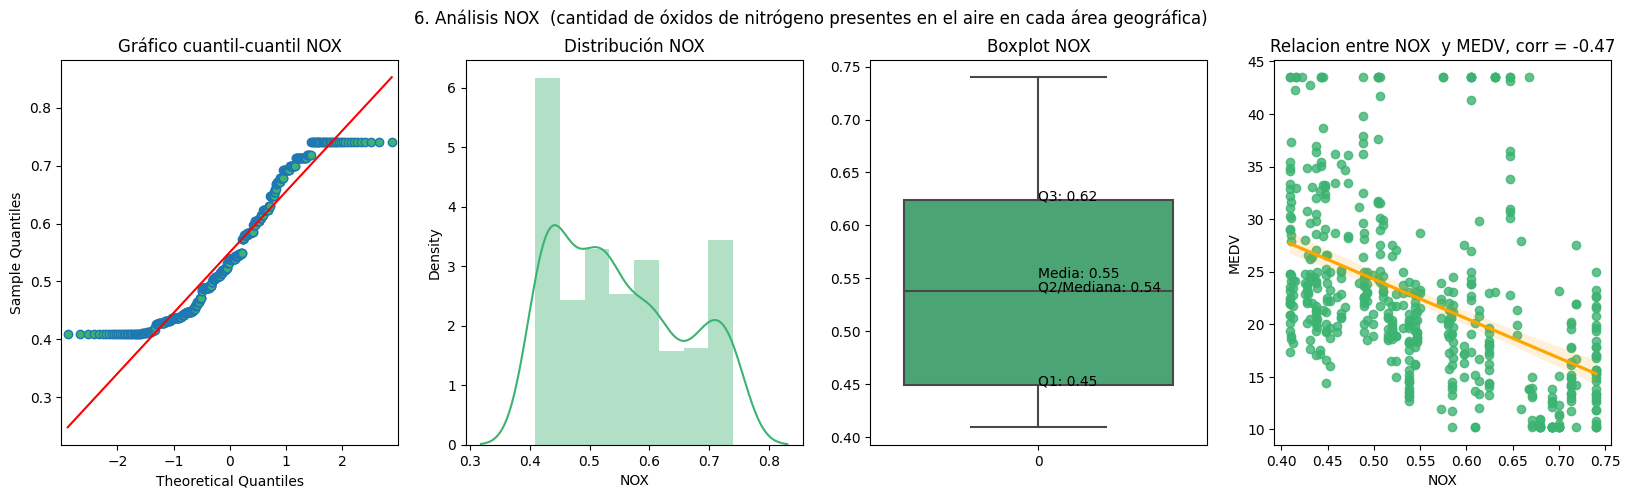

In [29]:
# Cuadro general
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
fig.savefig('mi_figura.png', dpi=300)
fig.suptitle("6. Análisis NOX  (cantidad de óxidos de nitrógeno presentes en el aire en cada área geográfica)")

# Grafico Q-Q
qqplot(df_wins['NOX'], line = 's', ax=axs[0], markerfacecolor='mediumseagreen')
axs[0].set_title("Gráfico cuantil-cuantil NOX")

# Chequear la normalidad de las variables seleccionadas
sns.distplot(df_wins['NOX'], ax=axs[1], color='mediumseagreen')
axs[1].set_title("Distribución NOX")

# Boxplot
sns.boxplot(df_wins['NOX'], ax=axs[2], color='mediumseagreen')
axs[2].set_title("Boxplot NOX")
# calcular los valores de los cuartiles y la media
q1 = df_wins['NOX'].quantile(0.25)
q2 = df_wins['NOX'].quantile(0.5)
q3 = df_wins['NOX'].quantile(0.75)
mean = df_wins['NOX'].mean()
# Agregar los valores de los cuartiles y la media a la gráfica
axs[2].text(0, q1, f'Q1: {q1:.2f}')
axs[2].text(0, q2, f'Q2/Mediana: {q2:.2f}')
axs[2].text(0, q3, f'Q3: {q3:.2f}')
axs[2].text(0, mean, f'Media: {mean:.2f}')

# Correlacion entre INDUS y MEDV
sns.regplot(x="NOX", y="MEDV", data=df_wins, fit_reg=True, ax=axs[3], scatter_kws={'color': 'mediumseagreen'}, line_kws={'color': 'orange'})
axs[3].set_title("Relacion entre NOX  y MEDV, corr = -0.47")

# Mostrar grafica
plt.show()


Es una medida de la calidad del aire en cada vecindario.

Un valor más **alto** de NOX indica una mayor concentración de óxidos de nitrógeno en el aire, lo que puede implicar una peor calidad del aire y una mayor contaminación en esa área.

Por otro lado, un valor más **bajo** de NOX indica una menor concentración de óxidos de nitrógeno y una mejor calidad del aire.

En general, los vecindarios con una menor concentración de óxidos de nitrógeno pueden ser percibidos como más deseables y, por lo tanto, pueden tener precios de viviendas más altos.

Se reporta un minimo de 0.38 y un maximo de 0.87.

### 3.7 RAD index of accessibility to radial highways (índice de accesibilidad a las carreteras principales)

Es una característica que indica un índice de accesibilidad a las principales autopistas desde cada área geográfica específica. Este índice puede tener valores enteros que varían de 1 a 24.

La característica RAD puede ser relevante para predecir los precios de las viviendas, ya que la accesibilidad y la cercanía a importantes vías de transporte son factores importantes que pueden influir en el valor de una propiedad.

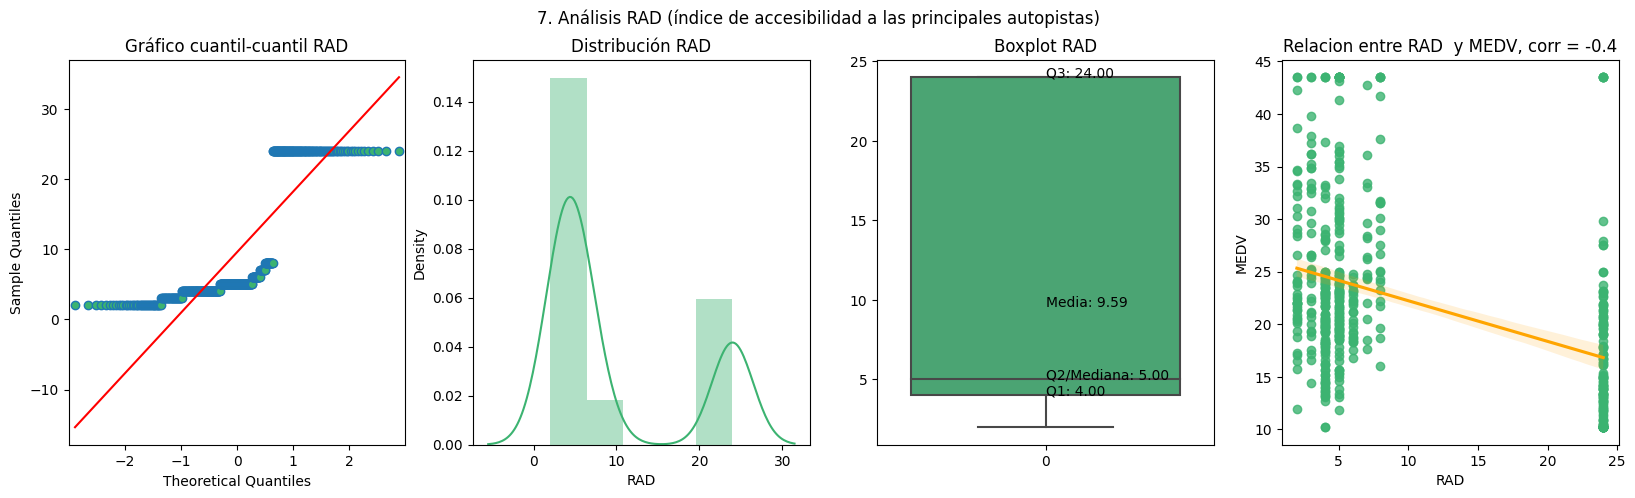

In [30]:
# Cuadro general
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
fig.savefig('mi_figura.png', dpi=300)
fig.suptitle("7. Análisis RAD (índice de accesibilidad a las principales autopistas)")

# Grafico Q-Q
qqplot(df_wins['RAD'], line = 's', ax=axs[0], markerfacecolor='mediumseagreen')
axs[0].set_title("Gráfico cuantil-cuantil RAD")

# Chequear la normalidad de las variables seleccionadas
sns.distplot(df_wins['RAD'], ax=axs[1], color='mediumseagreen')
axs[1].set_title("Distribución RAD")

# Boxplot
sns.boxplot(df_wins['RAD'], ax=axs[2], color='mediumseagreen')
axs[2].set_title("Boxplot RAD")
# Calcular los valores de los cuartiles y la media
q1 = df_wins['RAD'].quantile(0.25)
q2 = df_wins['RAD'].quantile(0.5)
q3 = df_wins['RAD'].quantile(0.75)
mean = df_wins['RAD'].mean()
# Agregar los valores de los cuartiles y la media a la gráfica
axs[2].text(0, q1, f'Q1: {q1:.2f}')
axs[2].text(0, q2, f'Q2/Mediana: {q2:.2f}')
axs[2].text(0, q3, f'Q3: {q3:.2f}')
axs[2].text(0, mean, f'Media: {mean:.2f}')

# Correlacion entre INDUS y MEDV
sns.regplot(x="RAD", y="MEDV", data=df_wins, fit_reg=True, ax=axs[3], scatter_kws={'color': 'mediumseagreen'}, line_kws={'color': 'orange'})
axs[3].set_title("Relacion entre RAD  y MEDV, corr = -0.4")

# Mostrar grafica
plt.show()


Un valor más **bajo** de RAD indica una mayor accesibilidad a las autopistas radiales, lo que significa que las áreas con valores bajos de "RAD" están más cerca de las principales vías de transporte, lo que facilita el acceso y la movilidad hacia otras áreas.

Por otro lado, un valor de RAD más **alto**  indica una menor accesibilidad a las autopistas radiales, lo que podría implicar que el área está más alejada de las principales vías de transporte y puede tener una movilidad limitada hacia otras áreas.

En general, los vecindarios con una mayor accesibilidad a las autopistas radiales pueden ser percibidos como más convenientes y, por lo tanto, pueden tener precios de viviendas más altos.

Se reporta un minimo de 1.0 y un maximo de 24.0.

### 3.8 MEDV Median value of owner-occupied homes in $1000's

Representa el valor medio de las viviendas ocupadas por sus propietarios en miles de dólares.

Es una de las características clave del conjunto de datos y es la variable objetivo que se busca predecir.

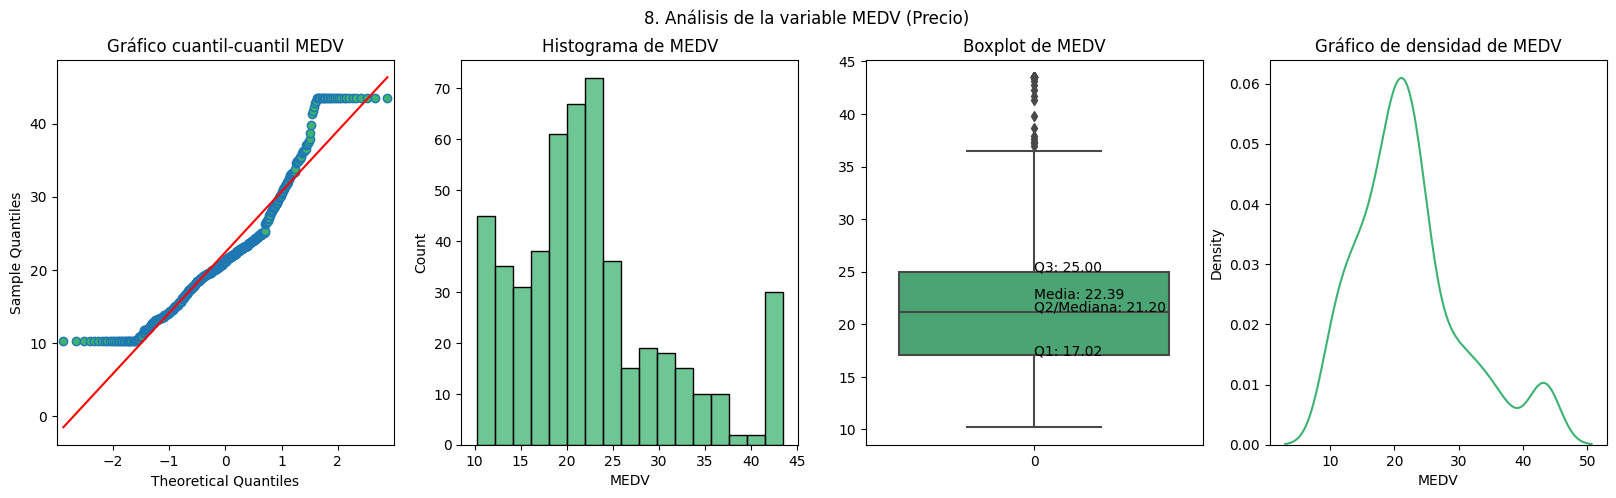

In [31]:
# Cuadro general
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
fig.suptitle("8. Análisis de la variable MEDV (Precio)")

# Grafico Q-Q
qqplot(df_wins['MEDV'], line='s', ax=axs[0], markerfacecolor='mediumseagreen')
axs[0].set_title("Gráfico cuantil-cuantil MEDV")

# Histograma
sns.histplot(df_wins['MEDV'], ax=axs[1], color='mediumseagreen')
axs[1].set_title("Histograma de MEDV")

# Diagrama de caja (boxplot)
sns.boxplot(df_wins['MEDV'], ax=axs[2], color='mediumseagreen')
axs[2].set_title("Boxplot de MEDV")
# Calcular los valores de los cuartiles y la media
q1 = df_wins['MEDV'].quantile(0.25)
q2 = df_wins['MEDV'].quantile(0.5)
q3 = df_wins['MEDV'].quantile(0.75)
mean = df_wins['MEDV'].mean()
# Agregar los valores de los cuartiles y la media a la gráfica
axs[2].text(0, q1, f'Q1: {q1:.2f}')
axs[2].text(0, q2, f'Q2/Mediana: {q2:.2f}')
axs[2].text(0, q3, f'Q3: {q3:.2f}')
axs[2].text(0, mean, f'Media: {mean:.2f}')

# Gráfico de densidad
sns.kdeplot(df_wins['MEDV'], ax=axs[3], color='mediumseagreen')
axs[3].set_title("Gráfico de densidad de MEDV")

# Mostrar grafica
plt.show()


Si un registro tiene un valor de "MEDV" de 24.0, esto indica que el precio medio estimado de las viviendas en ese vecindario es de 24,000 dólares (24.0 x $1000). Es importante tener en cuenta que estos valores son estimaciones y representan una simplificación de la realidad.

Se reporta un minimo de 5.0 y un maximo de 50.0.

**Gráfico Q-Q** permite evaluar si los datos se ajustan a una distribución normal. Si los puntos en el gráfico siguen una línea recta, entonces se puede asumir que los datos se ajustan a una distribución normal, comparando los cuantiles teóricos con los residuos estandarizados.

Los cuantiles teóricos se representan en el eje x y los residuos estandarizados se representan en el eje y.

Los **residuos estandarizados** son la diferencia entre los valores observados y los valores esperados, divididos por la desviación estándar de los residuos. Si los datos se ajustan a una distribución normal, entonces los residuos estandarizados deberían seguir una distribución normal estándar.

**Histograma**: muestra la distribución de la variable MEDV dividiendo los datos en intervalos (bins) y contando el número de observaciones en cada intervalo. Esto puede ayudar a identificar la forma de la distribución, así como cualquier valor atípico o anomalía en los datos.

**Diagrama de caja** (boxplot): muestra la mediana, los cuartiles y los valores extremos de la variable MEDV. Esto puede ayudar a identificar la dispersión y simetría de los datos, así como cualquier valor atípico.

**Gráfico de densidad**: muestra una estimación suavizada de la distribución de la variable MEDV. Al igual que con el histograma, esto puede ayudar a identificar la forma de la distribución y cualquier anomalía en los datos.

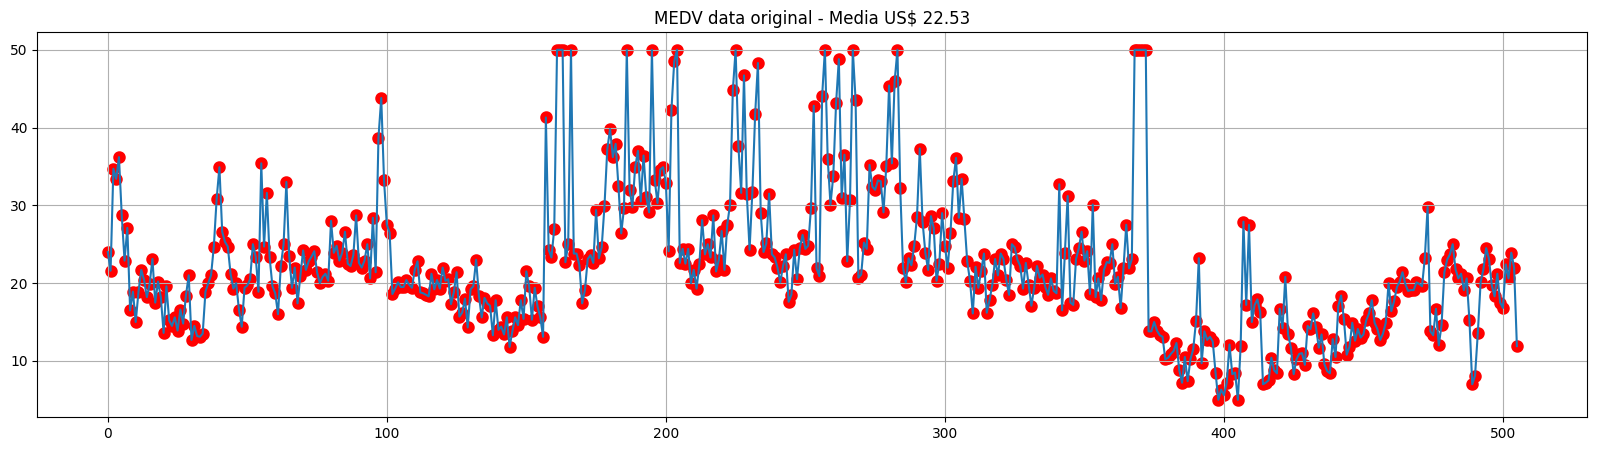

None


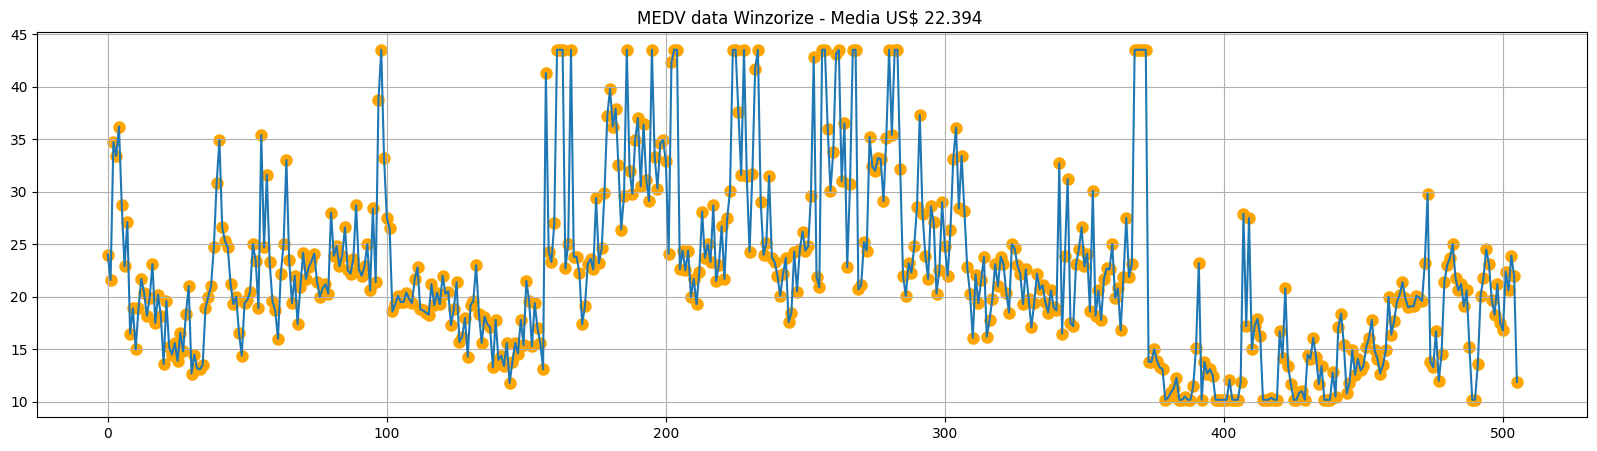

None


In [32]:
# Comportamiento de la variable MEDV

# Data original
plt.figure(figsize=(20,5))
plt.scatter(df_eda.index,df_eda["MEDV"], color="red", lw=3) # lw=3:ancho de línea de los marcadores será de 3 puntos
plt.plot(df_eda.index,df_eda["MEDV"]) # lineas celestes
plt.title("MEDV data original - Media US$ 22.53")
plt.grid(True) #cuadricula
print(plt.show())

# Data con Winzorize
plt.figure(figsize=(20,5))
plt.scatter(df_wins.index,df_wins["MEDV"], color="#FFA500", lw=3) # lw=3:ancho de línea de los marcadores será de 3 puntos
plt.plot(df_wins.index,df_wins["MEDV"]) # lineas celestes
plt.title("MEDV data Winzorize - Media US$ 22.394 ")
plt.grid(True) #cuadricula
print(plt.show())


### 4. Resumen del comportamiento de las variables seleccionadas

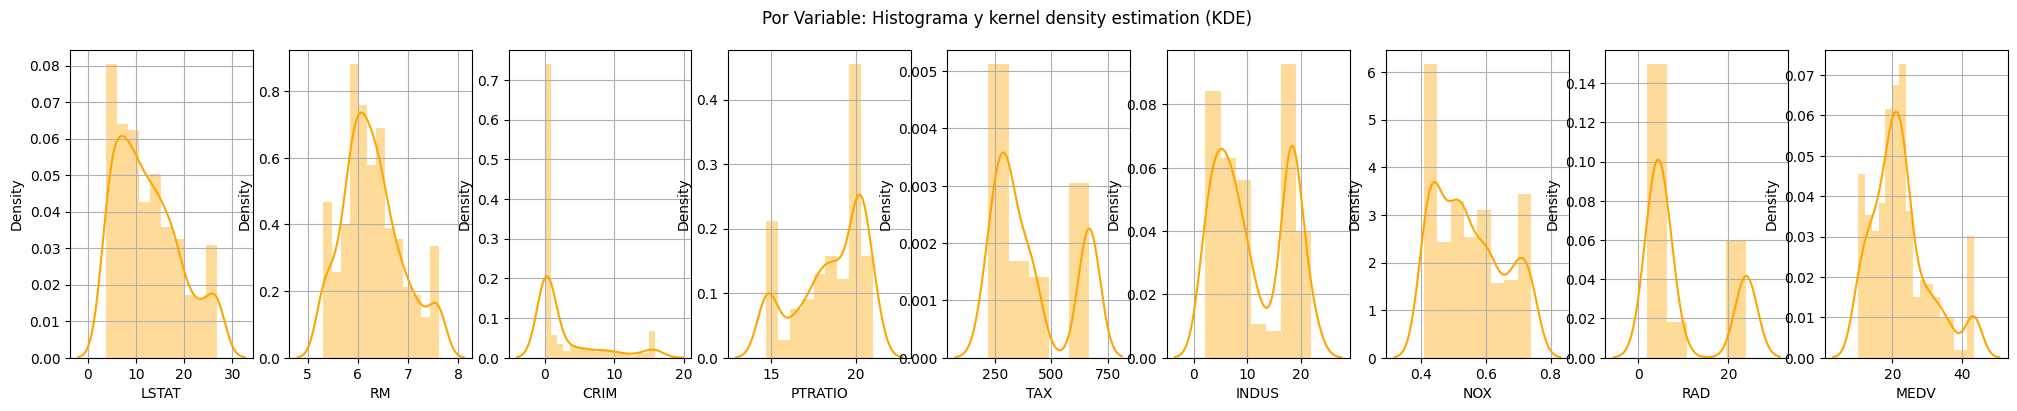

None


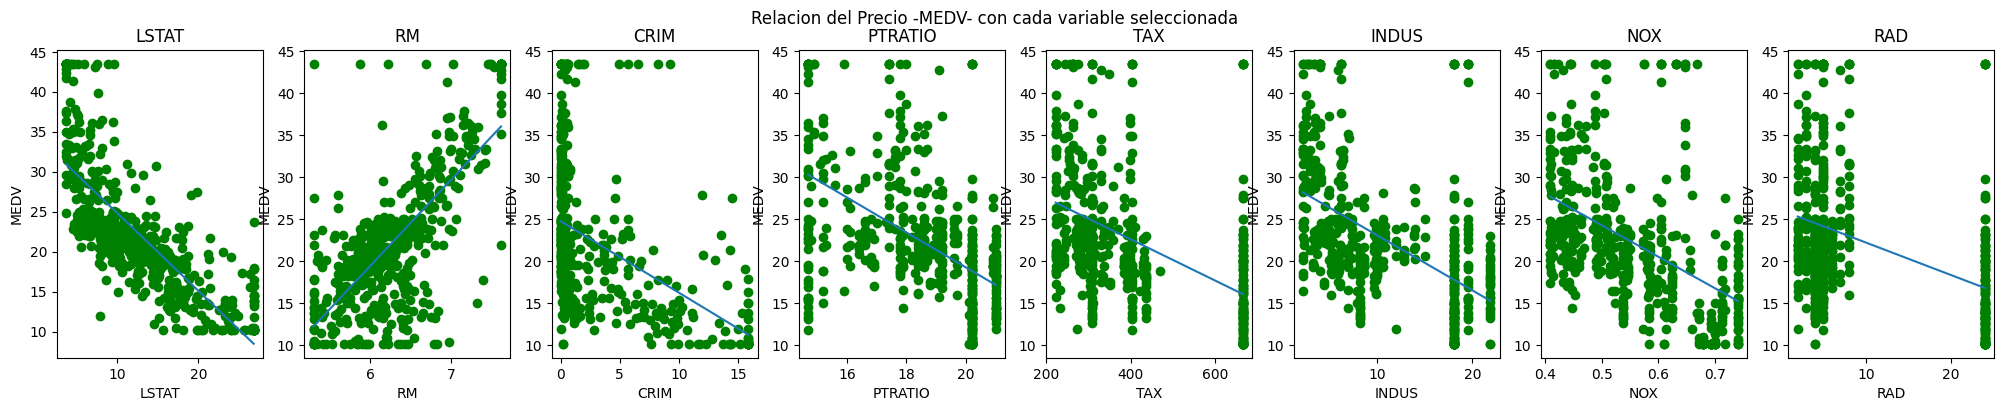

None


In [33]:
# Seleccionar las variables
variables = ['LSTAT', 'RM', 'CRIM', 'PTRATIO', 'TAX', 'INDUS', 'NOX', 'RAD', 'MEDV']

# Grafica 1
fig, ax1 = plt.subplots(1,9, figsize=(25,4)) # configura las graficas en 1 linea y 9 graficas
fig.suptitle("Por Variable: Histograma y kernel density estimation (KDE)")    # [1]
k = 0
columns = list(df_wins[variables])
for i in range(1):
    for j in range(9):
        if k < len(columns):
            sns.distplot(df_wins[columns[k]], ax = ax1[j], color='#FFA500')
            ax1[j].grid(True)
            k += 1
print(plt.show())

# Grafica 2
fig, ax1 = plt.subplots(1,8, figsize=(25,4))
fig.suptitle("Relacion del Precio -MEDV- con cada variable seleccionada") # Agregar título a la figura
for i, col in enumerate(variables):
    if i < len(ax1):
        x = df_wins[col]
        y = df_wins['MEDV']
        ax1[i].plot(x, y, 'go') # Cambiar el color de los puntos a verde
        # Create regression line
        ax1[i].plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
        ax1[i].set_title(col)
        ax1[i].set_xlabel(col)
        ax1[i].set_ylabel('MEDV')
print(plt.show())


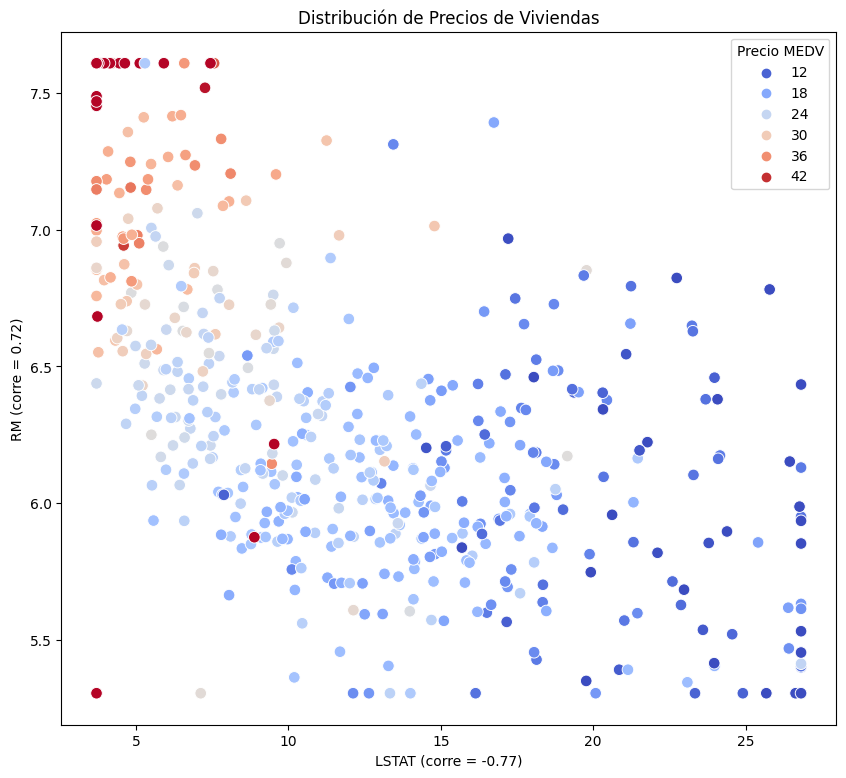

In [34]:
# Gráfico de dispersión de MEDV con relacion a LSTAT y RM
plt.figure(figsize=(10, 9))
sns.scatterplot(x=df_wins['LSTAT'], y=df_wins['RM'], hue=df_wins['MEDV'], palette='coolwarm', s=70)
plt.title('Distribución de Precios de Viviendas')
plt.xlabel('LSTAT (corre = -0.77)')
plt.ylabel('RM (corre = 0.72)')
plt.legend(title='Precio MEDV')
plt.show()


### 4. Prueba de hipotesis de normalidad

Para analizar la normalidad de los datos.

El p-value de estos test indica la probabilidad de obtener una distribución como la observada si los datos proceden realmente de una población con una distribución normal.

Se utiliza la modificación del Kolmogorov-Smirnov conocida como test Lilliefors, asume que la media y varianza son desconocidas ()

H0: La distribución es normal

H1: La distribución no es normal

p <= α = rechazar H0  , p > α = NO rechazar H0

In [35]:
# Utilizar una funcion para comparar p-value con α (nivel de significancia, alfa)
def check_p_val(p_value, alpha):

    if p_value <= alpha:
        print('la VAR NO tiene una distribucion normal')
    else:
        print('la VAR tiene una distribucion normal')


In [36]:
# Test Lilliefors
from statsmodels.stats.diagnostic import lilliefors

# Lista de columnas para calcular la prueba de Shapiro-Wilk
columns = ['MEDV', 'LSTAT', 'RM', 'INDUS', 'PTRATIO']

# Calcular la prueba de Lilliefors para cada columna
for col in columns:
    statistic, p_value = lilliefors(df_wins[col])    # [1]
    print(f'Prueba {col} = Estadístico: {statistic}, Valor p: {p_value}')

# [1] devuelve dos valores: el estadístico de prueba y el p-valor

Prueba MEDV = Estadístico: 0.1319149761629269, Valor p: 0.0009999999999998899
Prueba LSTAT = Estadístico: 0.09121652229241067, Valor p: 0.0009999999999998899
Prueba RM = Estadístico: 0.06570999320089049, Valor p: 0.0009999999999998899
Prueba INDUS = Estadístico: 0.23048533452772513, Valor p: 0.0009999999999998899
Prueba PTRATIO = Estadístico: 0.18626851231559038, Valor p: 0.0009999999999998899


In [37]:
# Comparar pvlue y α

# Lista de tuplas con el nombre de la variable y su valor p
variables = [('MEDV', 0.0009999999999998899),
             ('LSTAT', 0.0009999999999998899),
             ('RM', 0.0009999999999998899),
             ('INDUS', 0.0009999999999998899),
             ('PTRATIO', 0.0009999999999998899)]

# Nivel de significancia (valor de alpha α)
alpha = 0.05

# Comparar pvalue y α para cada variable
for var, pvalue in variables:
    result = check_p_val(pvalue, alpha)
    print(f'{var}: {result}')


la VAR NO tiene una distribucion normal
MEDV: None
la VAR NO tiene una distribucion normal
LSTAT: None
la VAR NO tiene una distribucion normal
RM: None
la VAR NO tiene una distribucion normal
INDUS: None
la VAR NO tiene una distribucion normal
PTRATIO: None


Las pruebas de normalidad son sensibles al tamaño de la muestra y pueden dar resultados diferentes dependiendo de la cantidad de datos disponibles. Además, tener en cuenta que en la práctica, la normalidad puede ser una suposición menos crítica para algunos análisis, especialmente si hay un gran conjunto de datos.

### 5. Ajuste de precios de la vivienda (MEDV) a la inflación

Se utilizo el All-Transactions House Price Index for Boston, MA (MSAD) de la FRED.

El MSAD es el índice de precios de todas las transacciones de viviendas en el Área Estadística Metropolitana (MSA) de Boston, Massachusetts. Considera todas las transacciones de viviendas, incluyendo ventas nuevas y existentes, lo que lo convierte en una medida más completa de los cambios en los precios del mercado de viviendas.

FRED (Federal Reserve Economic Data) https://fred.stlouisfed.org/series/ATNHPIUS14454Q

In [38]:
# Crear copia
df_inflacion = df_wins.copy()
df_inflacion


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.02763,18.0,2.31,0,0.538,6.575,65.2,4.0900,2,296,15.3,4.98,24.0
1,0.02763,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02763,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,3.70,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,2,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,2,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,2,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,2,273,21.0,6.48,22.0


In [39]:
# Factor de ajuste de inflación

# Definir valor de los índices
index_1978 = 29.78
index_2022 = 418.69

# Calcular el factor de ajuste
df_inflacion['factor_ajuste'] = round(index_2022 / index_1978, 2)

# Actualizar precios
df_inflacion['updated_MEDV'] = df_inflacion['MEDV'] * df_inflacion['factor_ajuste']
df_inflacion


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,factor_ajuste,updated_MEDV
0,0.02763,18.0,2.31,0,0.538,6.575,65.2,4.0900,2,296,15.3,4.98,24.0,14.06,337.440
1,0.02763,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,14.06,303.696
2,0.02763,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,14.06,487.882
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,3.70,33.4,14.06,469.604
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,14.06,508.972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,2,273,21.0,9.67,22.4,14.06,314.944
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,2,273,21.0,9.08,20.6,14.06,289.636
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,2,273,21.0,5.64,23.9,14.06,336.034
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,2,273,21.0,6.48,22.0,14.06,309.320


El Factor de Ajuste de Inflación de 14.06 indica que, en promedio, el valor de las viviendas en el año 2022 es aproximadamente 14.06 veces más alto que en el año 1978, según el All-Transactions House Price Index for Boston. Esto significa que los precios de las viviendas han experimentado un aumento significativo a lo largo de estos años, ajustados por la inflación.

Es importante tener en cuenta que el factor de ajuste por inflación no es una medida exacta del aumento del precio de la vivienda. Esto se debe a que el índice de precios de las transacciones de viviendas no tiene en cuenta todos los factores que afectan al precio de la vivienda, como la calidad de la vivienda, la ubicación y las características.

# Etapa 3: Seleccion del Modelo

**Supuestos:**

- Solo se trabajaron los valores atípicos

- Los datos no están standardized

- Los datos no están normalizados

- No se utilizo el datset con el factor de ajuste a la inflacion

### 3.1 Dividir la data en tres sets: entrenamiento, validacion y prueba

La elección de cómo dividir los datos depende de:
- el tamaño del conjunto de datos
- la complejidad del modelo
- los objetivos específicos del proyecto
- el contexto y el campo de aplicación

Experimentar con diferentes tamaños y evaluar el rendimiento del modelo en el conjunto de prueba puede ayudar a encontrar la mejor configuración para el problema.

Si el dataset es pequeño, es posible recurrir a técnicas avanzadas, como la validación cruzada y la búsqueda de hiperparámetros, para obtener estimaciones confiables del rendimiento del modelo.

La data se dividio en 60%-40%: 60% entrenamiento, 20% de validacion y 20% de prueba.

In [40]:
# Asignar variables 'x' e 'y'

# Seleccionar las variables
variables = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']

# Asignar variables
x = df_wins[variables]
y = df_wins['MEDV']


In [41]:
# 3.2 Sividir la data 80% (60% train-entrenamiento y 20% de validacion) y 20% de test (prueba)
from sklearn.model_selection import train_test_split

# a) separa la data en 2 conjuntos: 80% (tiene 60% datos de train-entrenamiento y 20% de validacion) y 20% de test (prueba)
x_trainyvalidacion, x_test, y_trainyvalidacion, y_test = train_test_split(x, y, test_size = 0.20)


In [42]:
# Ver la data que contiene el 80% (60% de entrenamiento y 20% de validacion) = 0.80*506 = 404.8 = 404 lineas
x_trainyvalidacion


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
131,1.19294,0.0,21.89,0,0.624,6.326,97.7,2.2710,4,437,21.0,12.26
328,0.06617,0.0,3.24,0,0.460,5.868,25.8,5.2146,4,430,16.9,9.97
179,0.05780,0.0,2.46,0,0.488,6.980,58.4,2.8290,3,222,17.8,5.04
70,0.08826,0.0,10.81,0,0.413,6.417,17.7,5.2873,4,305,19.2,6.72
413,15.86030,0.0,18.10,0,0.597,5.304,100.0,1.5894,24,666,20.2,20.08
...,...,...,...,...,...,...,...,...,...,...,...,...
223,0.61470,0.0,6.20,0,0.507,6.618,80.8,3.2721,8,307,17.4,7.60
42,0.14150,0.0,6.91,0,0.448,6.169,17.7,5.7209,3,233,17.9,5.81
119,0.14476,0.0,10.01,0,0.547,5.731,65.2,2.7592,6,432,17.8,13.61
108,0.12802,0.0,8.56,0,0.520,6.474,97.1,2.4329,5,384,20.9,12.27


In [43]:
# Ver la data que contiene el 20% de prueba = 0.20*506 = 101.2 = 101 lineas
x_test


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
395,8.71675,0.0,18.10,0,0.693,6.471,98.8,1.7257,24,666,20.2,17.12
436,14.42080,0.0,18.10,0,0.740,6.461,93.3,2.0026,24,666,20.2,18.05
268,0.54050,20.0,3.97,0,0.575,7.470,52.6,2.8720,5,264,14.7,3.70
240,0.11329,30.0,4.93,0,0.428,6.897,54.3,6.3361,6,300,16.6,11.38
68,0.13554,12.5,6.07,0,0.409,5.594,36.8,6.4980,4,345,18.9,13.09
...,...,...,...,...,...,...,...,...,...,...,...,...
263,0.82526,20.0,3.97,0,0.647,7.327,94.5,2.0788,5,264,14.7,11.25
420,11.08740,0.0,18.10,0,0.718,6.411,100.0,1.8589,24,666,20.2,15.02
492,0.11132,0.0,21.89,0,0.609,5.983,83.5,2.1099,4,666,20.1,13.35
22,1.23247,0.0,8.14,0,0.538,6.142,91.7,3.9769,4,307,21.0,18.72


In [44]:
# Ver la data, es una serie de pandas con una longitud de 404, tiene la variable objetivo precio (MEDV)
y_trainyvalidacion


131    19.6
328    19.3
179    37.2
70     24.2
413    16.3
       ... 
223    30.1
42     25.3
119    19.3
108    19.8
66     19.4
Name: MEDV, Length: 404, dtype: float64

In [45]:
# Ver la data, es una serie de pandas con una longitud de 102, tiene la variable objetivo precio (MEDV)
y_test


395    13.1
436    10.2
268    43.5
240    22.0
68     17.4
       ... 
263    31.0
420    16.7
492    20.1
22     15.2
23     14.5
Name: MEDV, Length: 102, dtype: float64

In [46]:
# b) Separar la data del 80% (trainyvalidacion) en 60% entrenamiento (train) y 20% de validacion
x_train, x_validacion, y_train, y_validacion = train_test_split(x_trainyvalidacion, y_trainyvalidacion,test_size = 0.25)


In [47]:
# Ver la data que contiene el 60% de entrenamiento = 0.75*404 = 303 lineas
x_train


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
414,15.86030,0.0,18.10,0,0.693,5.304,100.0,1.6582,24,666,20.2,26.82
31,1.35472,0.0,8.14,0,0.538,6.072,100.0,4.1750,4,307,21.0,13.04
170,1.20742,0.0,19.58,0,0.605,5.875,94.6,2.4259,5,403,14.7,14.43
52,0.05360,21.0,5.64,0,0.439,6.511,21.1,6.8147,4,243,16.8,5.28
220,0.35809,0.0,6.20,1,0.507,6.951,88.5,2.8617,8,307,17.4,9.71
...,...,...,...,...,...,...,...,...,...,...,...,...
177,0.05425,0.0,4.05,0,0.510,6.315,73.4,3.3175,5,296,16.6,6.29
499,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391,19.2,15.10
482,5.73116,0.0,18.10,0,0.532,7.061,77.0,3.4106,24,666,20.2,7.01
99,0.06860,0.0,2.89,0,0.445,7.416,62.5,3.4952,2,276,18.0,6.19


In [48]:
# Ver la data que contiene el 20% de validacion = 0.25*404 = 101 lineas
x_validacion


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
204,0.02763,80.0,2.68,0,0.4161,7.610,31.9,5.1180,4,224,14.7,3.70
69,0.12816,12.5,6.07,0,0.4090,5.885,33.0,6.4980,4,345,18.9,8.79
56,0.02763,80.0,2.18,0,0.4100,6.383,35.7,7.8278,2,313,17.3,5.77
467,4.42228,0.0,18.10,0,0.5840,6.003,94.5,2.5403,24,666,20.2,21.32
25,0.84054,0.0,8.14,0,0.5380,5.599,85.7,4.4546,4,307,21.0,16.51
...,...,...,...,...,...,...,...,...,...,...,...,...
172,0.13914,0.0,4.05,0,0.5100,5.572,88.5,2.5961,5,296,16.6,14.69
226,0.38214,0.0,6.20,0,0.5040,7.610,86.5,3.2157,8,307,17.4,3.70
259,0.65665,20.0,3.97,0,0.6470,6.842,100.0,2.0107,5,264,14.7,6.90
357,3.84970,0.0,18.10,1,0.7400,6.395,91.0,2.5052,24,666,20.2,13.27


In [49]:
# Ver la data, es una serie de pandas con una longitud de 303 (el 60% de entrenamiento = 0.75*404 = 303 lineas), tiene la variable objetivo precio (MEDV)
y_train


414    10.2
31     14.5
170    17.4
52     25.0
220    26.7
       ... 
177    24.6
499    17.5
482    25.0
99     33.2
314    23.8
Name: MEDV, Length: 303, dtype: float64

In [50]:
# Ver la data, es una serie de pandas con una longitud de 101 (el 20% de validacion = 0.25*404 = 101 lineas), tiene la variable objetivo precio (MEDV)
y_validacion


204    43.5
69     20.9
56     24.7
467    19.1
25     13.9
       ... 
172    23.1
226    37.6
259    30.1
357    21.7
35     18.9
Name: MEDV, Length: 101, dtype: float64

### 3.2 LazyPredict

Lazy Predict ayuda a construir varios modelos básicos sin mucho código y ayuda a entender qué modelos funcionan mejor sin ningún ajuste de parámetros.

https://lazypredict.readthedocs.io/en/latest/

In [ ]:
# Librerias
!pip install scikit-learn
!pip install lazypredict

# Suprimir advertencias
import warnings
warnings.filterwarnings("ignore")

from sklearn import metrics
from lazypredict.Supervised import LazyRegressor


In [52]:
# Obtener una lista de las métricas disponibles en el módulo sklearn.metrics
metric_names = [name for name in dir(metrics) if not name.startswith('_')]

# Imprimir la lista de métricas
print(metric_names)


['ConfusionMatrixDisplay', 'DetCurveDisplay', 'DistanceMetric', 'PrecisionRecallDisplay', 'PredictionErrorDisplay', 'RocCurveDisplay', 'SCORERS', 'accuracy_score', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'auc', 'average_precision_score', 'balanced_accuracy_score', 'brier_score_loss', 'calinski_harabasz_score', 'check_scoring', 'class_likelihood_ratios', 'classification_report', 'cluster', 'cohen_kappa_score', 'completeness_score', 'confusion_matrix', 'consensus_score', 'coverage_error', 'd2_absolute_error_score', 'd2_pinball_score', 'd2_tweedie_score', 'davies_bouldin_score', 'dcg_score', 'det_curve', 'euclidean_distances', 'explained_variance_score', 'f1_score', 'fbeta_score', 'fowlkes_mallows_score', 'get_scorer', 'get_scorer_names', 'hamming_loss', 'hinge_loss', 'homogeneity_completeness_v_measure', 'homogeneity_score', 'jaccard_score', 'label_ranking_average_precision_score', 'label_ranking_loss', 'log_loss', 'make_scorer', 'matthews_corrcoef', 'max_error', 'mean_absol

In [53]:
# Generar modelos

# Crea un objeto LazyRegressor
reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)

# Entrena y evalúa varios modelos con los datos de entrenamiento y validacion
models, predictions = reg.fit(x_train, x_validacion, y_train, y_validacion)

# Muestra resultados de los modelos ordenados por rendimiento
print(models)


100%|██████████| 42/42 [00:09<00:00,  4.35it/s]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000356 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 640
[LightGBM] [Info] Number of data points in the train set: 303, number of used features: 12
[LightGBM] [Info] Start training from score 21.833663
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

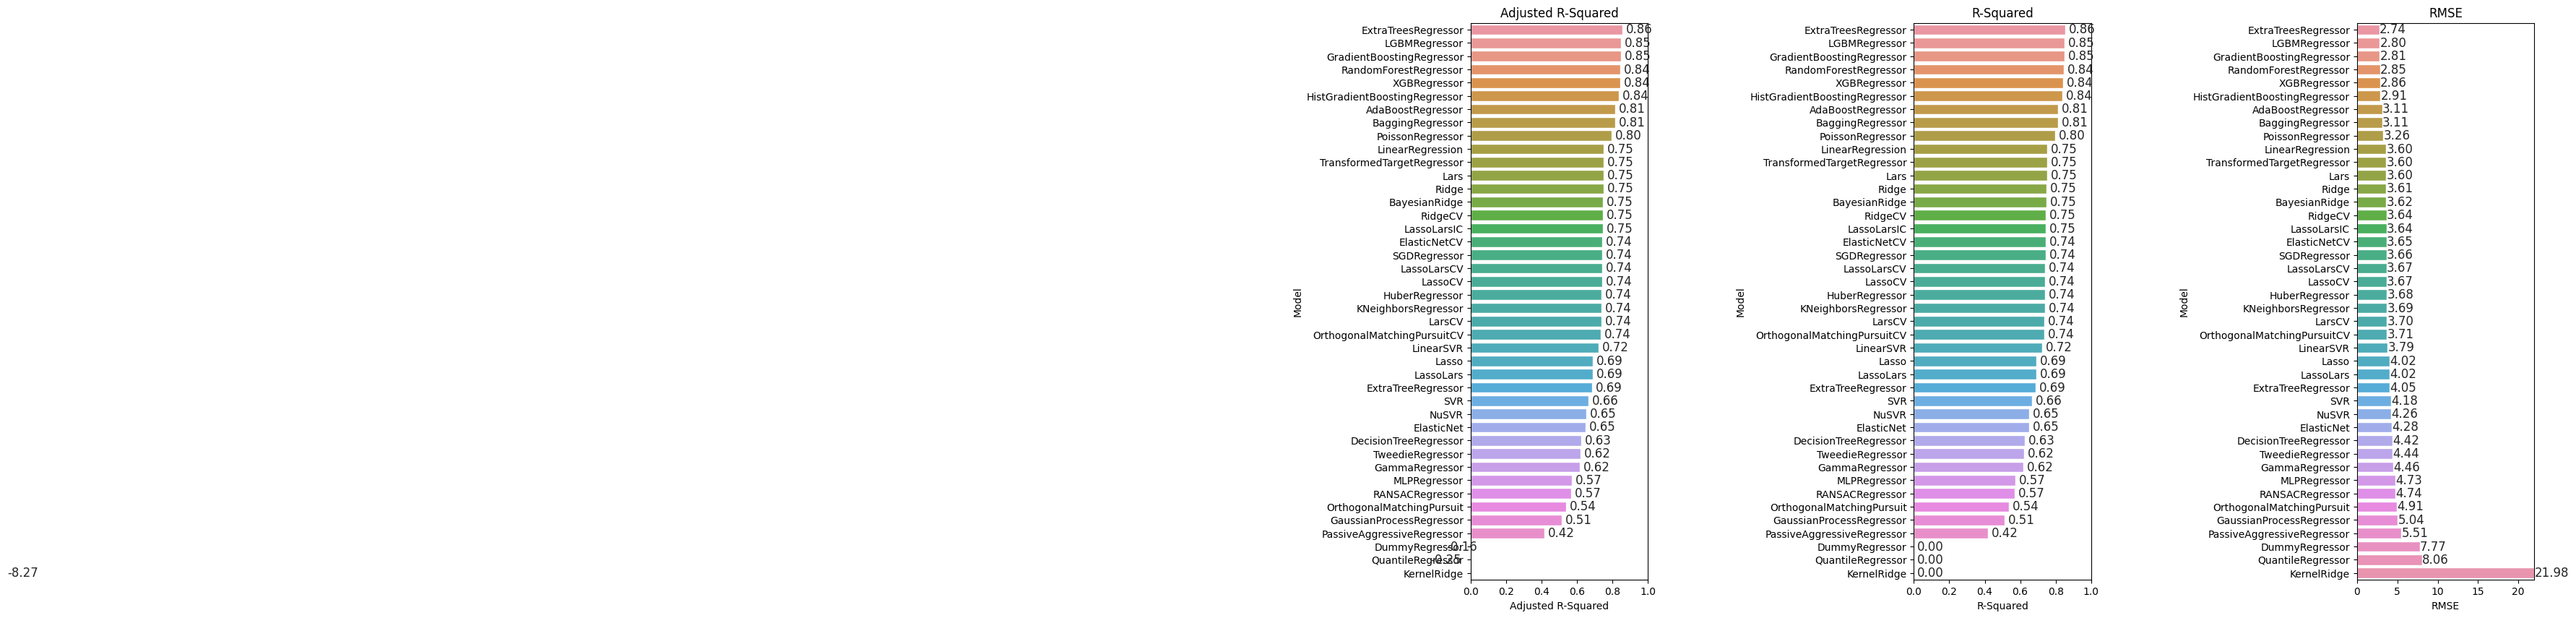

In [54]:
# Algunas metricas por modelo

# Libreriras
import matplotlib.pyplot as plt
import seaborn as sns

# Crear figura con 3 ejes
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(19, 10))
fig.subplots_adjust(wspace=1.5) # deja espacio entre graficas

# Primera gráfica: Adjusted R-Squared
predictions["R-Squared"] = [0 if i < 0 else i for i in predictions.iloc[:,0]]
sns.set_theme(style="whitegrid")
sns.barplot(y=predictions.index, x="Adjusted R-Squared", data=predictions, ax=ax1)
ax1.set(xlim=(0, 1))
ax1.set_title('Adjusted R-Squared')
for p in ax1.patches:          # muestra los valores en las barras
    width = p.get_width()
    ax1.text(width + 0.02,
            p.get_y() + p.get_height() / 2,
            '{:1.2f}'.format(width),
            ha="left",
            va="center")

# Segunda gráfica: R-Squared
sns.barplot(y=predictions.index, x="R-Squared", data=predictions, ax=ax2)
ax2.set(xlim=(0, 1))
ax2.set_title('R-Squared')
for p in ax2.patches:        # muestra los valores en las barras
    width = p.get_width()
    ax2.text(width + 0.02,
            p.get_y() + p.get_height() / 2,
            '{:1.2f}'.format(width),
            ha="left",
            va="center")

# Tercera gráfica: RMSE
sns.barplot(y=predictions.index, x="RMSE", data=predictions, ax=ax3)
max_rmse = predictions['RMSE'].max()
ax3.set(xlim=(0, max_rmse))    # define el maximo valor de RMSE
ax3.set_title('RMSE')
for p in ax3.patches:          # muestra los valores en las barras
    width = p.get_width()
    ax3.text(width + 0.02,
            p.get_y() + p.get_height() / 2,
            '{:1.2f}'.format(width),
            ha="left",
            va="center")

# Mostrar grafica
plt.show()


### 3.3 Doble verificacion de resultados


In [ ]:
# Librerias
!pip install --upgrade lazypredict
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


In [56]:
# Verificar resultados del modelo Gradient Boosting Regressor

# Crear modelo
gb_model = GradientBoostingRegressor(random_state=42)
# Entrenar el modelo
gb_model.fit(x_train, y_train)

# Hace predicciones utilizando el momdelo GradientBoostingRegressor
gb_predictions = gb_model.predict(x_validacion)

# Metricas de evaluacion
# R-Squared
r2 = r2_score(y_validacion, gb_predictions)
# Adjusted R-Squared
n = len(y_validacion)
p = x_validacion.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
# RMSE
mse = mean_squared_error(y_validacion, gb_predictions)
rmse = np.sqrt(mse)

# Mostrar resultados
print(f"GradientBoostingRegressor Model Results:")
print(f"R2 Score: {r2:.2f}")
print(f"Adjusted R2 Score: {adjusted_r2:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")


GradientBoostingRegressor Model Results:
R2 Score: 0.87
Adjusted R2 Score: 0.85
Mean Squared Error: 7.91
Root Mean Squared Error: 2.81


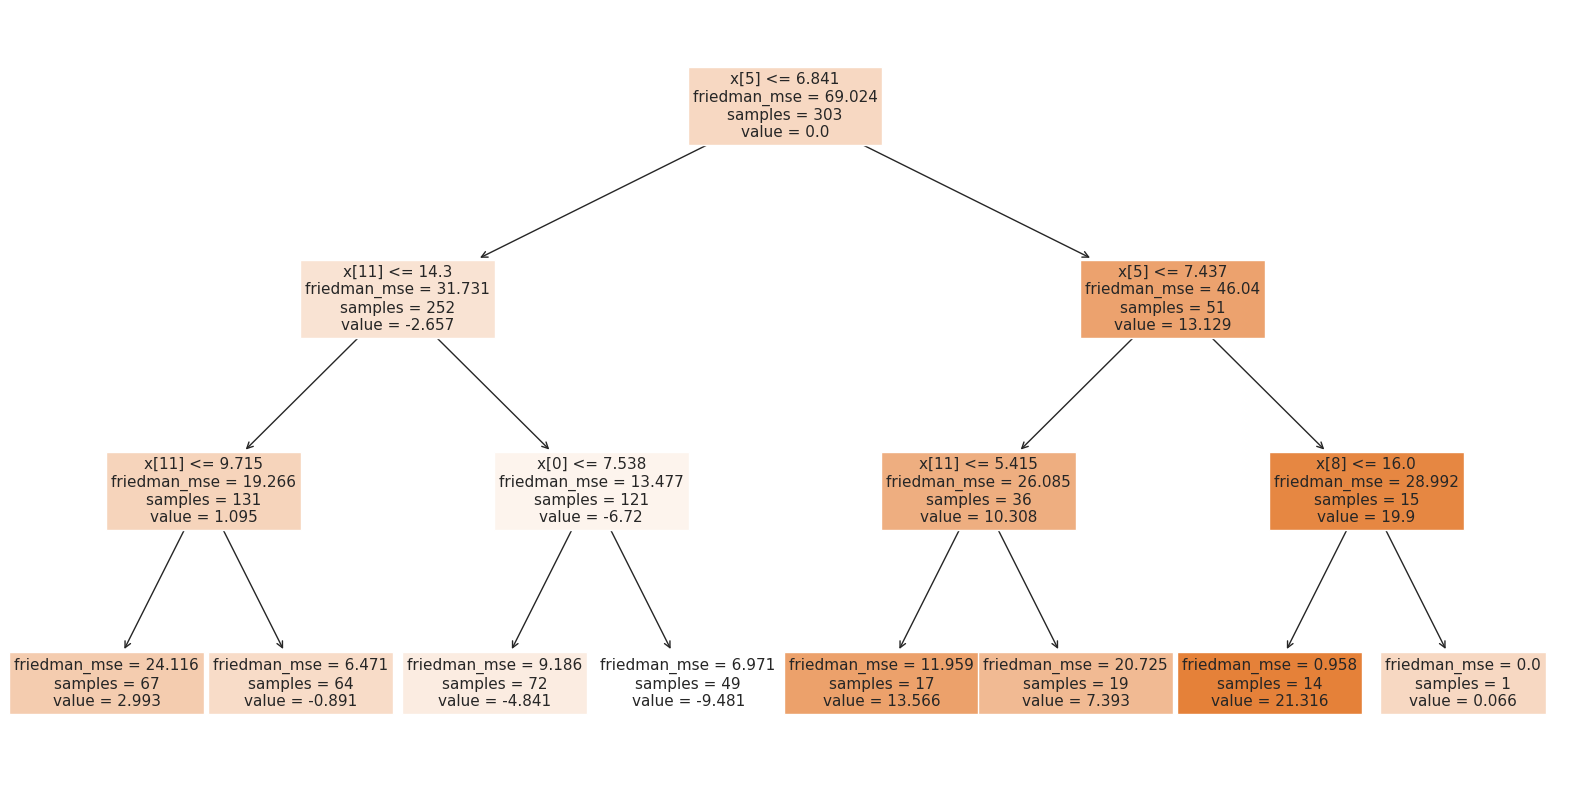

In [57]:
# Visualizar y examinar los árboles individuales del modelo GradientBoostingRegressor
from sklearn.tree import  plot_tree
import matplotlib.pyplot as plt

# Visualizar el primer árbol en el modelo
plt.figure(figsize=(20, 10))
plot_tree(gb_model.estimators_[0, 0], filled=True)
plt.show()


El modelo Gradient Boostin Regressor es un modelo de aprendizaje automático basado en árboles de decisión que utiliza el método de boosting para mejorar el rendimiento.

A diferencia de los modelos lineales, como la regresión lineal, que tienen una ecuación matemática simple que describe la relación entre las variables independientes y la variable dependiente, los modelos basados en árboles de decisión no tienen una ecuación matemática única que describa el modelo completo.

En su lugar, el modelo Gradient Boosting Regressor está compuesto por una serie de árboles de decisión, cada uno de los cuales contribuye a la predicción final. Cada árbol de decisión en el modelo se construye para minimizar el error residual del árbol anterior, y la predicción final se calcula sumando las predicciones de todos los árboles en el modelo.

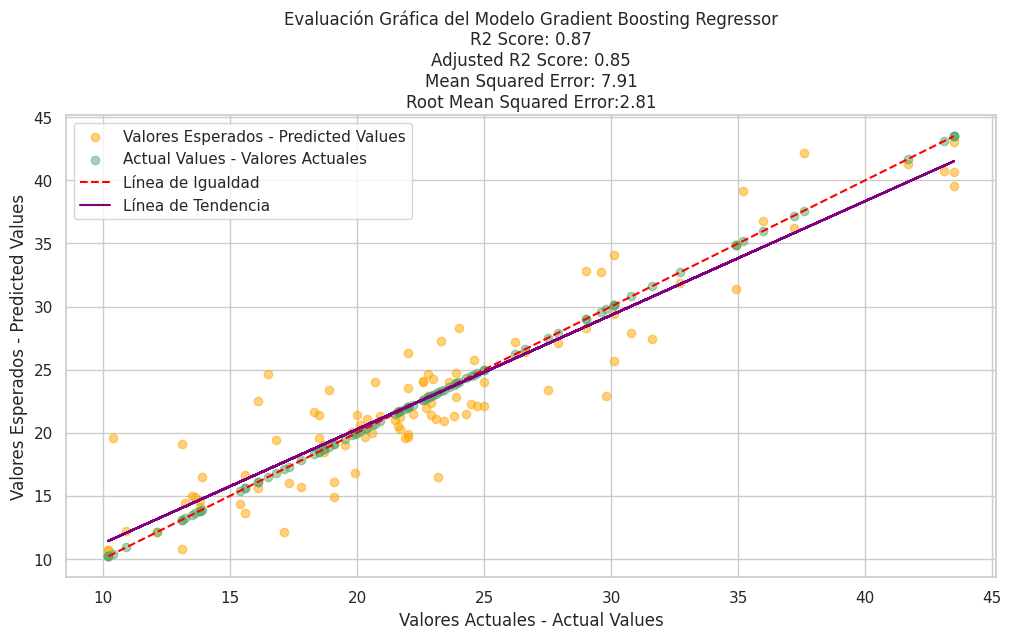

In [58]:
# Evaluacion grafica del modelo  Gradient Boosting Regressor
import plotly.express as px

# Tamano figura
plt.figure(figsize=(12, 6))
# Crea gráfico
plt.scatter(y_validacion, gb_predictions, alpha=0.5, color='orange', label='Valores Esperados - Predicted Values')
plt.scatter(y_validacion, y_validacion, alpha=0.5, color='g', label='Actual Values - Valores Actuales')

# Agrega línea de igualdad en rojo
plt.plot([min(y_validacion), max(y_validacion)], [min(y_validacion), max(y_validacion)], color='red', linestyle='--', label='Línea de Igualdad')

# Calcula línea de tendencia en lila
z = np.polyfit(y_validacion, gb_predictions, 1)
p = np.poly1d(z)
plt.plot(y_validacion, p(y_validacion), "purple", label='Línea de Tendencia')
#print("Coeficientes de la línea de tendencia:", z)

# Diseño grafica
plt.xlabel("Valores Actuales - Actual Values")
plt.ylabel("Valores Esperados - Predicted Values")
plt.title(f"Evaluación Gráfica del Modelo Gradient Boosting Regressor\nR2 Score: {r2:.2f}\nAdjusted R2 Score: {adjusted_r2:.2f}\nMean Squared Error: {mse:.2f}\nRoot Mean Squared Error:{rmse:.2f}")
plt.legend()
plt.show()


Al evaluar el modelo Gradient Boosting Regressor de forma gráfica, se visualiza cómo se comparan las predicciones del modelo con los valores reales. Esto  permite comprender cómo de bien se ajustan las predicciones a los datos reales y cómo se comporta el modelo en diferentes rangos de precios.

1. **Scatter Plot (Gráfico de Dispersión):**
   En un scatter plot, donde los valores reales están en el eje x y las predicciones están en el eje y, cada punto representa un ejemplo en tu conjunto de datos. Los puntos deben estar cerca de la línea de igualdad (diagonal roja) para indicar que las predicciones están en línea con los valores reales. Si los puntos están dispersos alrededor de la línea de igualdad, el modelo está prediciendo de manera precisa.

2. **Línea de Igualdad (Línea Roja):**
   Representa la situación ideal donde las predicciones coinciden exactamente con los valores reales. Si los puntos están alineados cerca de esta línea, significa que el modelo está haciendo predicciones precisas. Si los puntos están por encima de la línea, significa que las predicciones están siendo subestimadas, y si están por debajo, están siendo sobreestimadas.

3. **Línea de Tendencia (Línea Púrpura):**
   Es una representación visual de la relación entre las predicciones del modelo y los valores reales. Los coeficientes de la línea de tendencia (pendiente e intercepto) indican cómo se ajusta la línea a los datos. Si la línea se ajusta muy cerca de la línea de igualdad, muestra que el modelo es capaz de predecir de manera coherente.

4. **Puntos en el Gráfico:**
   Observa cómo los puntos se distribuyen en el gráfico. Si los puntos están dispersos uniformemente alrededor de la línea de igualdad, el modelo está haciendo predicciones consistentes en todo el rango de precios. Si hay más dispersión en ciertas áreas, podría indicar que el modelo tiene dificultades en predecir en esas regiones.

El objetivo es tener puntos cercanos a la línea de igualdad y que la línea de tendencia siga una tendencia similar. La evaluación gráfica proporciona una comprensión rápida de cómo está funcionando el modelo y  ayuda a identificar áreas en las que podría necesitar mejoras.

 ### 3.4 Testing the model (Prueba del modelo)

La validación de modelos es el proceso en el que un modelo entrenado se evalúa con un conjunto de datos de test-prueba. Se realiza después del entrenamiento del modelo. Tiene como objetivo encontrar un modelo óptimo con el mejor rendimiento.

El conjunto de datos de test-prueba es una porción separada del mismo conjunto de datos del que se deriva el conjunto de entrenamiento. El objetivo principal de utilizar el conjunto de datos de test-prueba es comprobar la capacidad de generalización de un modelo entrenado (Alpaydin 2010).

In [59]:
# Crear modelo
gb2_model = GradientBoostingRegressor(random_state=42)

# Entrenar el modelo
gb2_model.fit(x_train, y_train)


GradientBoostingRegressor(random_state=42)

In [60]:
# Probar el modelo
precios_pronosticados = gb2_model.predict(x_test)

print('Precios de la Vivienda Pronosticados')
print(precios_pronosticados)


Precios de la Vivienda Pronosticados
[14.54500257 14.00616524 44.35408889 28.2124163  20.23244409 43.06513569
 13.29638019 21.38559488 18.77606044 41.63133152 16.56351073 21.00592697
 25.45446499 27.3196584   9.92011654 18.98663193 12.31897734 15.42929358
 21.19886758 22.07803359 24.18320572 20.98435785 19.33955514 40.18742229
 13.11147686 23.06497332 23.68647805 18.72932675 19.08912299 11.52262601
 26.11767614 43.31244587 20.50780302 22.03706884 43.0233971  21.90034304
 29.55836114 22.84371977 21.67320761 19.26632491 30.29336501 24.85957699
 21.28482147 21.36842513 28.62166722 18.9067599  34.0331741  27.59412081
 42.74955668 43.80799111 24.87025734 21.0418472  26.17488385 18.95948204
 18.44043169 20.95777065 14.2907371  21.33812585 23.93789203 21.38527117
 15.66671063 25.7941189  11.28324781 24.94193002 20.52967712 14.50164816
 34.74200125 30.70412175 18.41338759 16.60754403 22.86619787 15.82389779
 32.90517255 21.44501392 23.10965349 30.79601068 29.68035849 35.2253123
 15.32536279 20

In [61]:
# Verifica que la lista precios_pronosticados y y_test tengan la misma longitud y estén en el mismo orden, es esencial para que los puntos se correspondan correctamente en el scatter plot
if len(precios_pronosticados) == len(y_test):
    print("Las listas tienen la misma longitud. Los datos están en el mismo orden.")


Las listas tienen la misma longitud. Los datos están en el mismo orden.


In [62]:
# Crear un df con precios pronosticados y precios reales
precios_comparados = pd.DataFrame(
    {"Precios Pronosticados": precios_pronosticados, "Precios Actuales": y_test})

print("Precios Pronosticados y Precios Actuales") # titulo
#print(precios_comparados.to_string())   # to_string(): imprime el df completo


Precios Pronosticados y Precios Actuales


 ### 3.4.1 Visualization of Testing the Model ( Visuzalizacion de la prueba del modelo)

In [63]:
# Calcular la desviación [1]
desviacion = precios_pronosticados - y_test
# Agregar la columna de desviación al DataFrame
precios_comparados['Desviación'] = desviacion

# Ordenar el DataFrame por la columna "Desviación" en orden ascendente [2]
precios_comparados_ordenados = precios_comparados.sort_values(by='Desviación') # orden ascendente, utilizar el método sort_values

print("Precios Actuales, Precios Pronosticados y Desviacion") # titulo
print(precios_comparados_ordenados.to_string())   # to_string(): imprimir DataFrame completo


# [1] La desviación o dispersión mide la diferencia entre los precios pronosticados y los precios reales, y puede ayudarte a entender cómo de cerca están las predicciones del modelo a los valores reales.
# [2] Ordenar la columna “Desviación” en orden ascendente puede ser útil para ver cómo se distribuyen los errores entre los precios pronosticados y los precios reales.
# puedes ver fácilmente cuáles son las observaciones con los errores más grandes y más pequeños, y cómo se distribuyen los errores en general.

Precios Actuales, Precios Pronosticados y Desviacion
     Precios Pronosticados  Precios Actuales  Desviación
7                    16.56             27.10      -10.54
181                  26.12             36.20      -10.08
391                  13.30             23.20       -9.90
368                  35.23             43.50       -8.27
278                  23.69             29.10       -5.41
502                  15.77             20.60       -4.83
279                  30.70             35.10       -4.40
198                  30.29             34.60       -4.31
183                  28.62             32.50       -3.88
132                  19.27             23.00       -3.73
407                  24.18             27.90       -3.72
359                  18.96             22.60       -3.64
277                  29.68             33.10       -3.42
483                  18.91             21.80       -2.89
480                  20.16             23.00       -2.84
214                  21.01         

In [64]:
# Visualizar precios y desviacion
import plotly.express as px

# Crear un df para la visualización
visualizacion_df = precios_comparados.copy()
visualizacion_df['Index'] = range(len(visualizacion_df))

# Calcular desviación [1]
desviacion = visualizacion_df['Precios Pronosticados'] - visualizacion_df['Precios Actuales']

# Crear figura interactiva
fig = px.scatter(visualizacion_df, x='Index', y='Precios Actuales',
                 color_discrete_sequence=['green'],
                 labels={'Index': 'Índice', 'Precios Actuales': 'Precios Actuales'})
fig.add_trace(px.line(visualizacion_df, x='Index', y='Precios Pronosticados',
                      color_discrete_sequence=['orange'],
                      labels={'Index': 'Índice', 'Precios Pronosticados': 'Precios Pronosticados'}).data[0])
fig.add_trace(px.line(visualizacion_df, x='Index', y=desviacion,
                      color_discrete_sequence=['red'],
                      labels={'Index': 'Índice', 'Desviación': 'Desviación'}).data[0])

# Diseño grafica
fig.update_layout(
    title='Precios Actuales vs. Precios Pronosticados y Desviacion',
    xaxis_title='Índice',
    yaxis_title='Precios',
    legend_title='Datos',
    width=1400,
    height=600,
    template='plotly_white'
)

# Mostrar grafica
fig.show()


In [65]:
# Gráfica de dispersión

# librerias
import numpy as np
!pip install plotly
import plotly.express as px
import plotly.graph_objects as go

# Grafica
fig = px.scatter(precios_comparados,
                 x="Precios Actuales", y="Precios Pronosticados",
                 color="Precios Pronosticados",
                 title="Precios Pronosticados vs. Precios Actuales",
                 labels={"Precios Actuales": "Precios Actuales", "Precios Pronosticados": "Precios Pronosticados"},
                 size_max=30,  # Tamaño máximo de los puntos
                 color_continuous_scale=['green', 'orange'])  # Tonos de verde a naranja

# Línea de igualdad
fig.add_shape(type='line', x0=min(y_test), y0=min(y_test), x1=max(y_test), y1=max(y_test),
              line=dict(color='red', dash='dash'))
# Etiquetas
fig.add_annotation(text="Línea de Igualdad", xref='paper', yref='paper', x=0.95, y=0.05, showarrow=False, font=dict(color='red'))

# Pendiente y la intercepción de la línea de tendencia
slope, intercept = np.polyfit(precios_comparados["Precios Actuales"], precios_comparados["Precios Pronosticados"], 1)
# Línea de tendencia
fig.add_trace(go.Scatter(x=precios_comparados["Precios Actuales"],
                         y=slope*precios_comparados["Precios Actuales"]+intercept, mode='lines',
                         line=dict(color='purple', dash='dash')))
# Etiquetas
fig.add_annotation(text="Línea de Tendencia", xref='paper', yref='paper', x=0.95, y=0.1, showarrow=False, font=dict(color='purple'))

# Tamaño y fondo blanco
fig.update_layout(width=1100, height=600, template='plotly_white')

# Mostrar grafica
fig.show()
# mostrar valor de la pendiente
#print(f"La pendiente de la línea de tendencia es: {slope:.2f}")
#print(slope)

# la función add_annotation. Las anotaciones se ubican en la esquina inferior derecha del gráfico utilizando las coordenadas x=0.95 y y=0.1 para la primera anotación y x=0.95 y y=0.05 para la segunda anotación. Las coordenadas se especifican en relación al tamaño del gráfico utilizando los argumentos xref='paper' y yref='paper'. También se especifica el color del texto utilizando el argumento font=dict(color='...')


# Siguientes Pasos

Desarrollo de otros modelos

Uso de SHAP y LIME
